<a href="https://colab.research.google.com/github/ThakurinTech/yogaposeclassification/blob/main/Yoga_Pose_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mounting GDrive**

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


**Necessary Installs**

In [ ]:
!pip install -q imageio
!pip install -q opencv-python
!pip install -q git+https://github.com/tensorflow/docs


  Preparing metadata (setup.py) ... done


In [ ]:
pip install tensorflow-docs

**Importing Required Libraries**

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# linear algebra
import numpy as np
import bokeh

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow_docs.vis import embed
import numpy as np
import cv2

# Import matplotlib libraries
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.patches as patches

# Some modules to display an animation using imageio.
import imageio
from IPython.display import HTML, display
# data visualization
import plotly.express as px
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import numpy as np
import cv2
import tensorflow as tf


# Import matplotlib libraries
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.patches as patches

# Some modules to display an animation using imageio.
import imageio
from IPython.display import HTML, display

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
#pose detection
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow_docs.vis import embed
import numpy as np
import cv2

# Import matplotlib libraries
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.patches as patches

# Some modules to display an animation using imageio.
import imageio
from IPython.display import HTML, display
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow_docs.vis import embed
import numpy as np
import cv2

# Import matplotlib libraries
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.patches as patches

# Some modules to display an animation using imageio.
import imageio
from IPython.display import HTML, display


**Initial Data Description and Summary Statitics**

In [ ]:
csv_file_path = "/content/drive/MyDrive/data/new_yoga_posture.csv".

In [ ]:
image_path="/content/drive/MyDrive/content/new_gscaled"

In [ ]:
# full path or a relative path to CSV file
csv_file_path = "/content/drive/MyDrive/data/new_yoga_posture.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print(df.head())



     images               label
0   9-0.png  ashtanga_namaskara
1  17-0.png  ashtanga_namaskara
2  28-0.png  ashtanga_namaskara
3  49-0.png  ashtanga_namaskara
4  35-0.png  ashtanga_namaskara


In [ ]:
# Get the shape of the DataFrame
shape_of_df = df.shape

# Print the shape
print("Shape of the DataFrame:", shape_of_df)

#Here I have 2454 images in 2 columns of image and label


Shape of the DataFrame: (2454, 2)


In [ ]:
#Get information about the dataset, including the number of samples and features

print(df.info())

#non-null (non-missing) values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  2454 non-null   object
 1   label   2454 non-null   object
dtypes: object(2)
memory usage: 38.5+ KB
None


In [ ]:
#Summary statistics for numerical features

print(df.describe())

#There are 513 unique image filenames.
#There are 44 unique categories or classes of yoga postures.

          images                 label
count       2454                  2454
unique       513                    44
top     45-0.png  chaturanga_dandasana
freq          31                    90


In [ ]:
#Summary statistics Box Plot

import plotly.express as px
import pandas as pd

# Read the CSV file into a DataFrame
csv_file_path = "/content/drive/MyDrive/data/new_yoga_posture.csv"
df = pd.read_csv(csv_file_path)

# Create a box plot using plotly
fig = px.box(df, x='label', y='images', title='Summary Statistics - Box Plot')
fig.update_xaxes(title_text='Label')
fig.update_yaxes(title_text='Images')
fig.show()


In [ ]:
#calculates and prints the count of unique values in the 'label' column of a pandas DataFrame

print(df['label'].value_counts())


chaturanga_dandasana           90
ardha_matsyendrasana           90
bitilasana                     87
garudasana                     78
bakasana                       77
bhujangasana                   73
gomukhasana                    72
astavakrasana                  72
balasana                       71
baddha_konasana                70
chakravakasana                 70
ardha_uttanasana               66
halasana                       66
anjaneyasana                   64
bhujapidasana                  61
dandasana                      60
adho_mukha_vriksasana          59
ananda_balasana                59
eka_pada_koundinyanasana_ii    58
kapotasana                     57
dwi_pada_viparita_dandasana    55
eka_pada_rajakapotasana_ii     55
bharadvajasana_i               54
camatkarasana                  54
ardha_chandrasana              52
eka_pada_koundinyanasana_i     51
janu_sirsasana                 48
ardha_pincha_mayurasana        47
bhairavasana                   46
dhanurasana   

In [ ]:
# Created a bar chart using Plotly Express
fig = px.bar(df, x='label', title='Label Counts')

# Customize the layout
fig.update_layout(
    xaxis_title='Label',
    yaxis_title='Count',
    xaxis_tickangle=-45,
    width=1200
)

# Show the plot
fig.show()


In [ ]:
#  Made the Data Machine Readable
label_encoder = LabelEncoder()
df['encoded_label'] = label_encoder.fit_transform(df['label'])


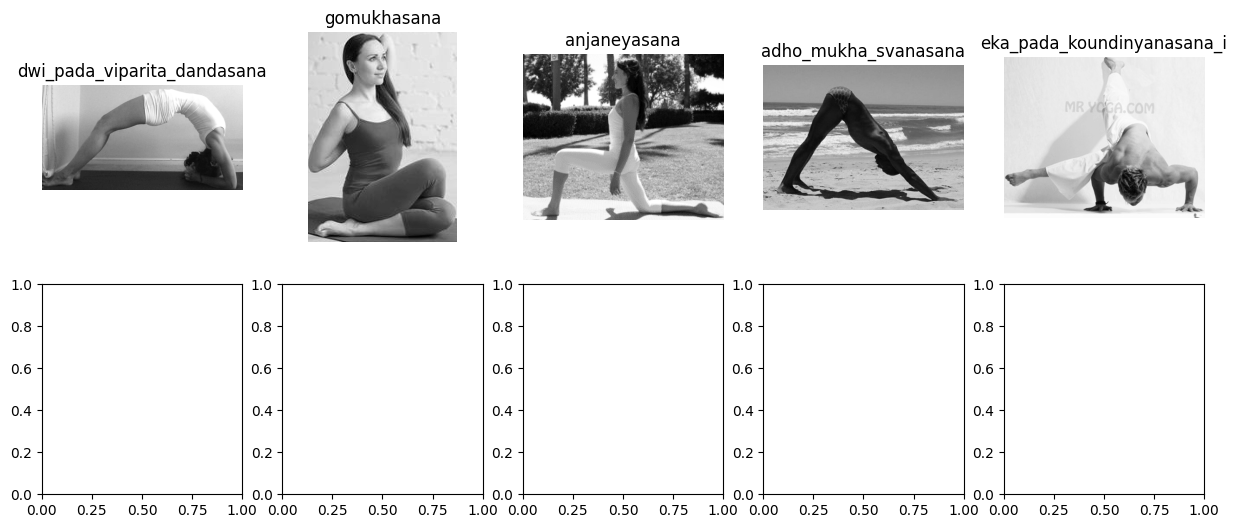

In [ ]:
#Raw Data visualization before Pre-processing

import matplotlib.pyplot as plt
import os
import pandas as pd

# Assuming df is your DataFrame containing image paths and labels
# Displayed a few sample images
sample_images = df.sample(5)
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
parent_dir = "/content/drive/MyDrive/data/new_yoga_posture.csv"
raw_dir = os.path.join(parent_dir, "/content/drive/MyDrive/content/new_gscaled")

for idx, (image, label) in enumerate(zip(sample_images['images'], sample_images['label'])):
    img_path = os.path.join(raw_dir, label, image)

    # Check if the image file exists
    if os.path.exists(img_path):
        img = plt.imread(img_path)
        axes[idx // 5, idx % 5].imshow(img, cmap='gray')
        axes[idx // 5, idx % 5].set_title(label)
        axes[idx // 5, idx % 5].axis('off')
    else:
        axes[idx // 5, idx % 5].set_title(f"Image not found: {img_path}")
        axes[idx // 5, idx % 5].axis('off')

plt.show()


**Pre-Processing Images**

**Directory Path**

In [ ]:
import os

# Directory containing your images
image_dir = "/content/drive/MyDrive/content/new_gscaled"

# List to store paths of all images
image_paths = []

# Walk through the directory and collect image paths
for root, dirs, files in os.walk(image_dir):
    for file in files:
        if file.endswith(".jpg") or file.endswith(".png"):  # Adjust file extensions as needed
            image_paths.append(os.path.join(root, file))


**RESIZING IMAGES**

Streaming output truncated to the last 5000 lines.
Original image size: (130, 169), Resized image size: (100, 100)
Original image size: (134, 132), Resized image size: (100, 100)
Original image size: (228, 343), Resized image size: (100, 100)
Original image size: (142, 311), Resized image size: (100, 100)
Original image size: (439, 244), Resized image size: (100, 100)
Original image size: (398, 726), Resized image size: (100, 100)
Original image size: (386, 463), Resized image size: (100, 100)
Original image size: (251, 370), Resized image size: (100, 100)
Original image size: (307, 529), Resized image size: (100, 100)
Original image size: (515, 785), Resized image size: (100, 100)
Original image size: (185, 234), Resized image size: (100, 100)
Original image size: (161, 321), Resized image size: (100, 100)
Original image size: (330, 462), Resized image size: (100, 100)
Original image size: (691, 841), Resized image size: (100, 100)
Original image size: (382, 602), Resized image size: 

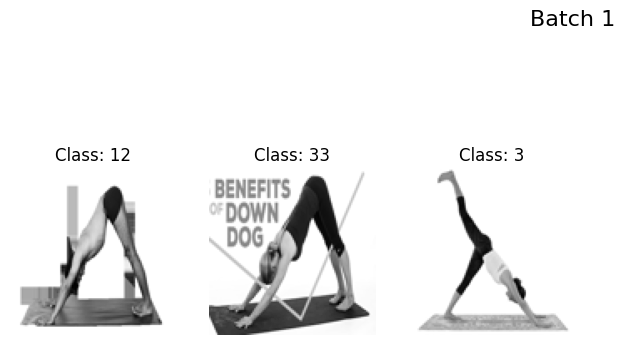

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
import tensorflow as tf

# Define the target size for resizing
target_size = (100, 100)  # Adjust the target size to make the images smaller

# Function to resize an image using PIL
def resize_image(img):
    resized_img = img.resize(target_size)
    print(f"Original image size: {img.size}, Resized image size: {resized_img.size}")
    return resized_img

# Directory containing the images
directory = "/content/drive/MyDrive/content/new_gscaled"

# Function to preprocess a batch of images and labels
def preprocess_batch(batch_images, batch_labels):
    resized_images = [resize_image(Image.open(img_path)) for img_path in batch_images]
    return np.array([np.array(img) for img in resized_images]), batch_labels

# Setup data generator without rescaling pixel values
datagen = tf.keras.preprocessing.image.ImageDataGenerator()

# Setup generator for the entire dataset
generator = datagen.flow_from_directory(
    directory,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Manually resize images after loading them
resized_batches = []
for _ in range(len(generator)):
    images, labels = next(generator)
    resized_batch, resized_labels = preprocess_batch(generator.filepaths, labels)
    resized_batches.append((resized_batch, resized_labels))

# Visualize batches
for i, (images, labels) in enumerate(resized_batches[:1]):  # Visualize the first 3 batches
    plt.figure(figsize=(15, 5))
    for j in range(min(3, len(images))):  # Visualize up to 6 images per batch
        ax = plt.subplot(1, 6, j + 1)
        plt.imshow(images[j], cmap='gray')  # Apply a grayscale colormap
        plt.title(f'Class: {np.argmax(labels[j])}')  # Use np.argmax to get the index of the one-hot encoded label
        plt.axis("off")
    plt.suptitle(f'Batch {i+1}', fontsize=16)
    plt.show()


**Staritified sampling and splitting into test and train data**

In [ ]:
 import tensorflow as tf


# Directory containing the images
directory = "/content/drive/MyDrive/content/new_gscaled"

# Setup data generator without rescaling pixel values
datagen = tf.keras.preprocessing.image.ImageDataGenerator()

# Setup generator for the entire dataset
generator = datagen.flow_from_directory(
    directory,
    target_size=(100, 100),  # Assuming the images are already resized
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Manually resize images after loading them
resized_batches = []
for _ in range(len(generator)):
    images, labels = next(generator)
    resized_batches.append((images, labels))


# Convert one-hot encoded labels to class indices

# Combine resized images and labels into single lists
all_images = []
all_labels = []
for batch in resized_batches:
    images, labels = batch
    all_images.extend(images)
    all_labels.extend(np.argmax(labels, axis=1))

# Convert lists to numpy arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Verify the shapes of the combined arrays
print("All images shape:", all_images.shape)
print("All labels shape:", all_labels.shape)

# Split data into stratified training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    all_images, all_labels, stratify=all_labels, test_size=0.2, random_state=42
)

# Verify the shapes of the split datasets
print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test labels shape:", test_labels.shape)

Found 2454 images belonging to 44 classes.
All images shape: (2454, 100, 100, 3)
All labels shape: (2454,)
Train images shape: (1963, 100, 100, 3)
Test images shape: (491, 100, 100, 3)
Train labels shape: (1963,)
Test labels shape: (491,)


Train images shape: (1963, 100, 100, 3)
Test images shape: (491, 100, 100, 3)
Train labels shape: (1963,)
Test labels shape: (491,)


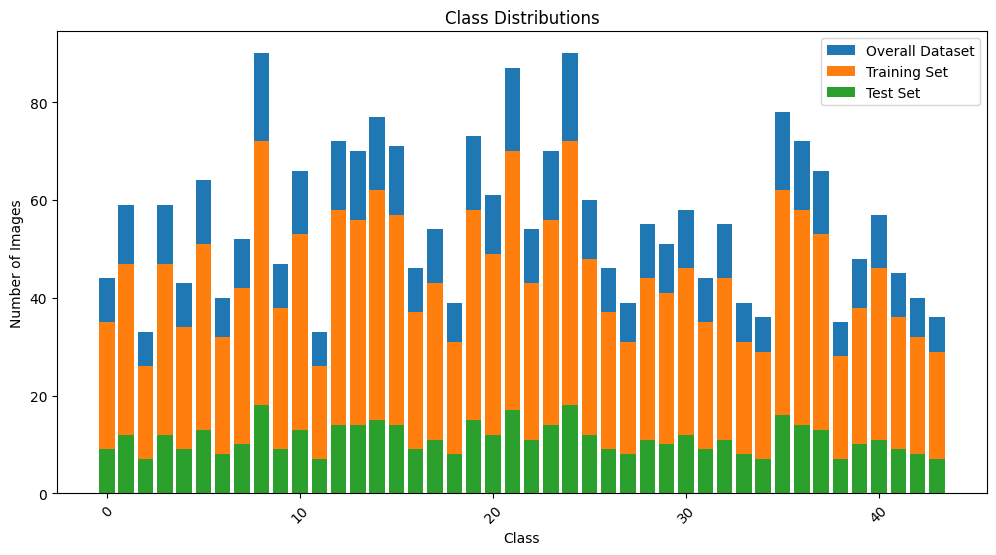

In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter
# Split data into stratified training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    all_images, all_labels, stratify=all_labels, test_size=0.2, random_state=42
)

# Verify the shapes of the split datasets
print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test labels shape:", test_labels.shape)

# Count the number of images per class in the overall dataset
overall_class_counts = Counter(all_labels)

# Count the number of images per class in the training set
train_class_counts = Counter(train_labels)

# Count the number of images per class in the test set
test_class_counts = Counter(test_labels)

# Plot class distributions
plt.figure(figsize=(12, 6))
plt.bar(overall_class_counts.keys(), overall_class_counts.values(), label='Overall Dataset')
plt.bar(train_class_counts.keys(), train_class_counts.values(), label='Training Set')
plt.bar(test_class_counts.keys(), test_class_counts.values(), label='Test Set')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distributions')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Convert resized batches into NumPy arrays
import numpy as np

# Assuming you have already defined train_images, test_images, train_labels, and test_labels
# Convert lists to NumPy arrays
train_images_array = np.array(train_images)
test_images_array = np.array(test_images)
train_labels_array = np.array(train_labels)
test_labels_array = np.array(test_labels)

# Verify the shapes of the converted arrays
print("Train images shape:", train_images_array.shape)
print("Test images shape:", test_images_array.shape)
print("Train labels shape:", train_labels_array.shape)
print("Test labels shape:", test_labels_array.shape)


Train images shape: (1963, 100, 100, 3)
Test images shape: (491, 100, 100, 3)
Train labels shape: (1963,)
Test labels shape: (491,)


**Unsupervised Learning for exploring data**

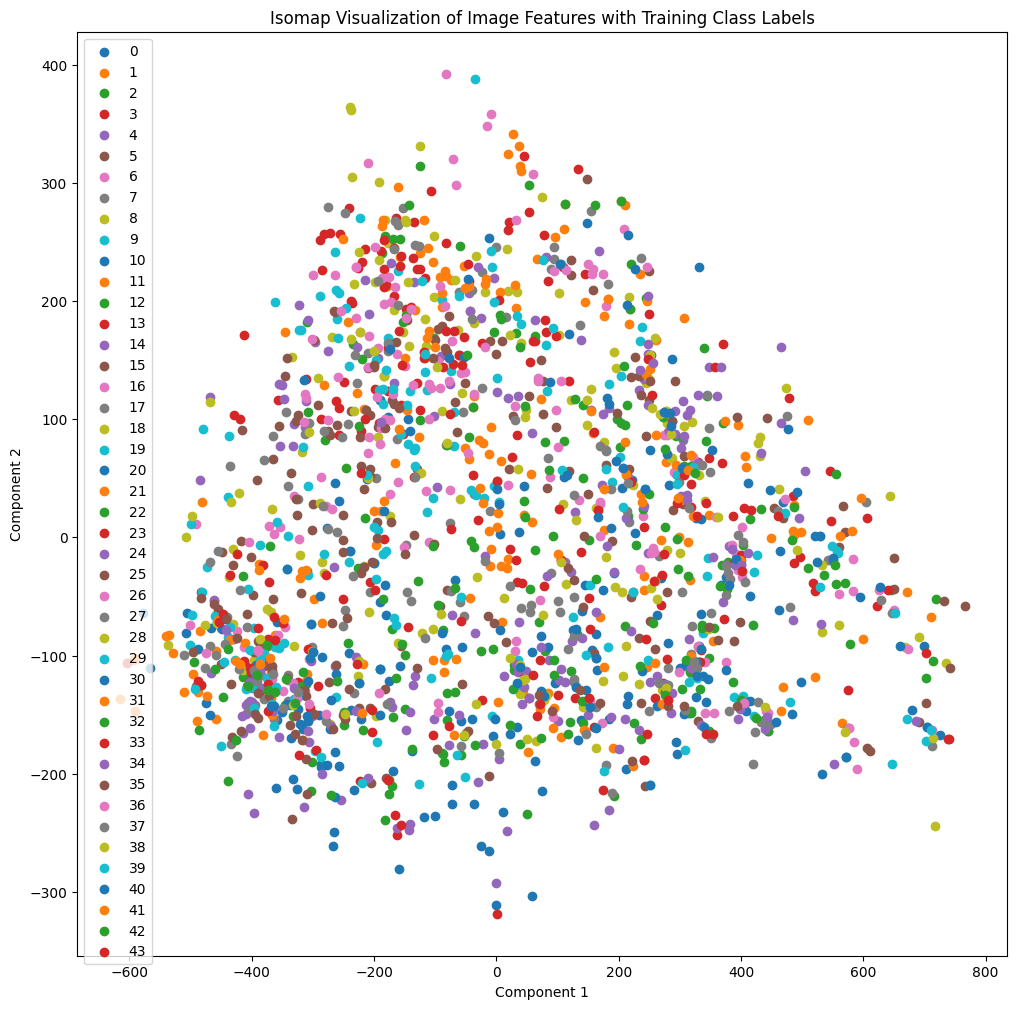

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding, TSNE, Isomap
from sklearn.manifold import SpectralEmbedding
from sklearn.preprocessing import StandardScaler

# Load training and testing data from numpy arrays
train_images = train_images_array  # Assuming train_images_array is already loaded
test_images = test_images_array    # Assuming test_images_array is already loaded
train_labels = train_labels_array  # Assuming train_labels_array is already loaded
test_labels = test_labels_array    # Assuming test_labels_array is already loaded

# Scale the features
scaler = StandardScaler()
scaled_train_images = scaler.fit_transform(train_images.reshape(len(train_images), -1))
scaled_test_images = scaler.transform(test_images.reshape(len(test_images), -1))

# Apply Locally Linear Embedding (LLE) for dimensionality reduction
lle = LocallyLinearEmbedding(n_components=2)
train_lle_features = lle.fit_transform(scaled_train_images)
test_lle_features = lle.transform(scaled_test_images)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2)
train_tsne_features = tsne.fit_transform(scaled_train_images)
test_tsne_features = tsne.fit_transform(scaled_test_images)

# Apply Laplacian Eigenmaps for dimensionality reduction
laplacian = SpectralEmbedding(n_components=2, affinity='nearest_neighbors')
train_laplacian_features = laplacian.fit_transform(scaled_train_images)
test_laplacian_features = laplacian.fit_transform(scaled_test_images)

# Apply Isomap for dimensionality reduction
isomap = Isomap(n_components=2)
train_isomap_features = isomap.fit_transform(scaled_train_images)
test_isomap_features = isomap.fit_transform(scaled_test_images)


# Plotting Isomap features with class labels
plt.figure(figsize=(12, 12))
unique_labels = np.unique(train_labels)
for label in unique_labels:
    plt.scatter(train_isomap_features[train_labels == label, 0], train_isomap_features[train_labels == label, 1], label=label)
plt.title('Isomap Visualization of Image Features with Training Class Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()


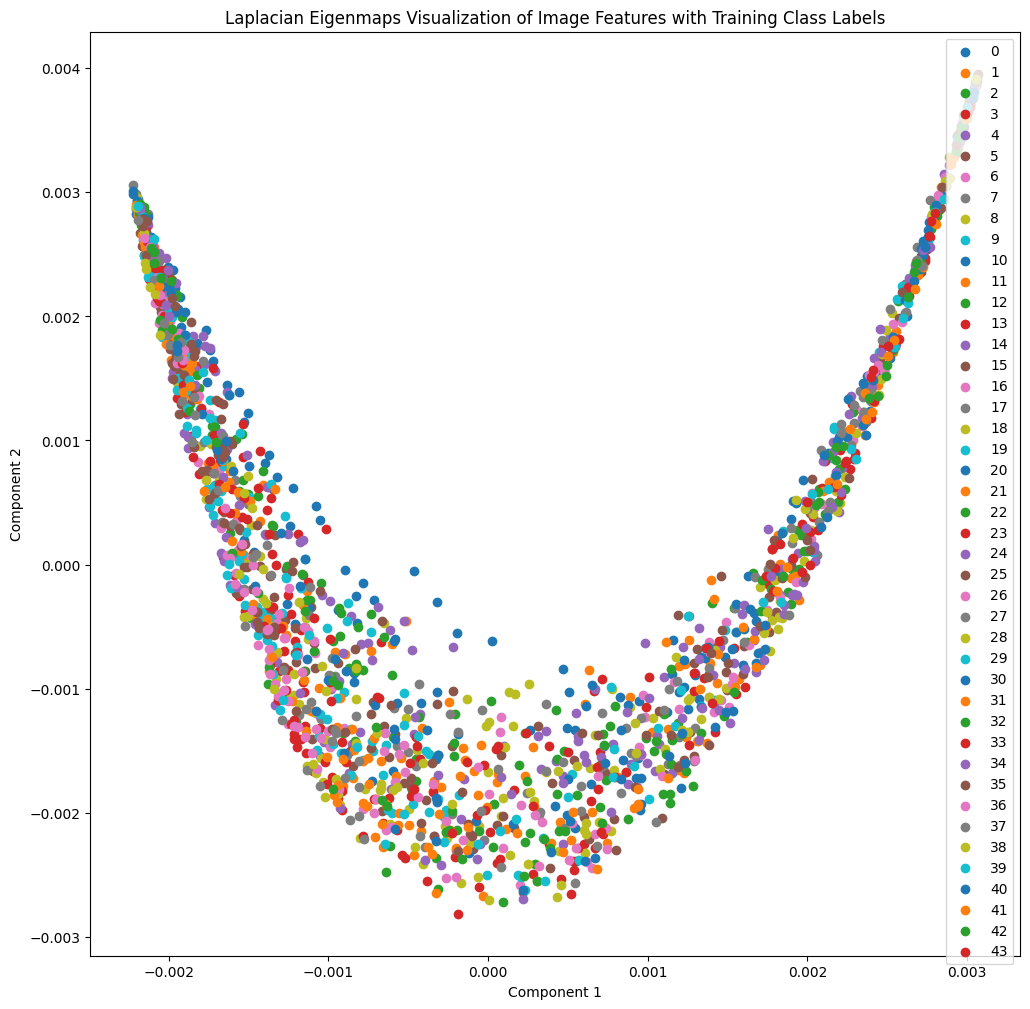

In [ ]:

# Plotting Laplacian Eigenmaps features with class labels
plt.figure(figsize=(12, 12))
unique_labels = np.unique(train_labels)
for label in unique_labels:
    plt.scatter(train_laplacian_features[train_labels == label, 0], train_laplacian_features[train_labels == label, 1], label=label)
plt.title('Laplacian Eigenmaps Visualization of Image Features with Training Class Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

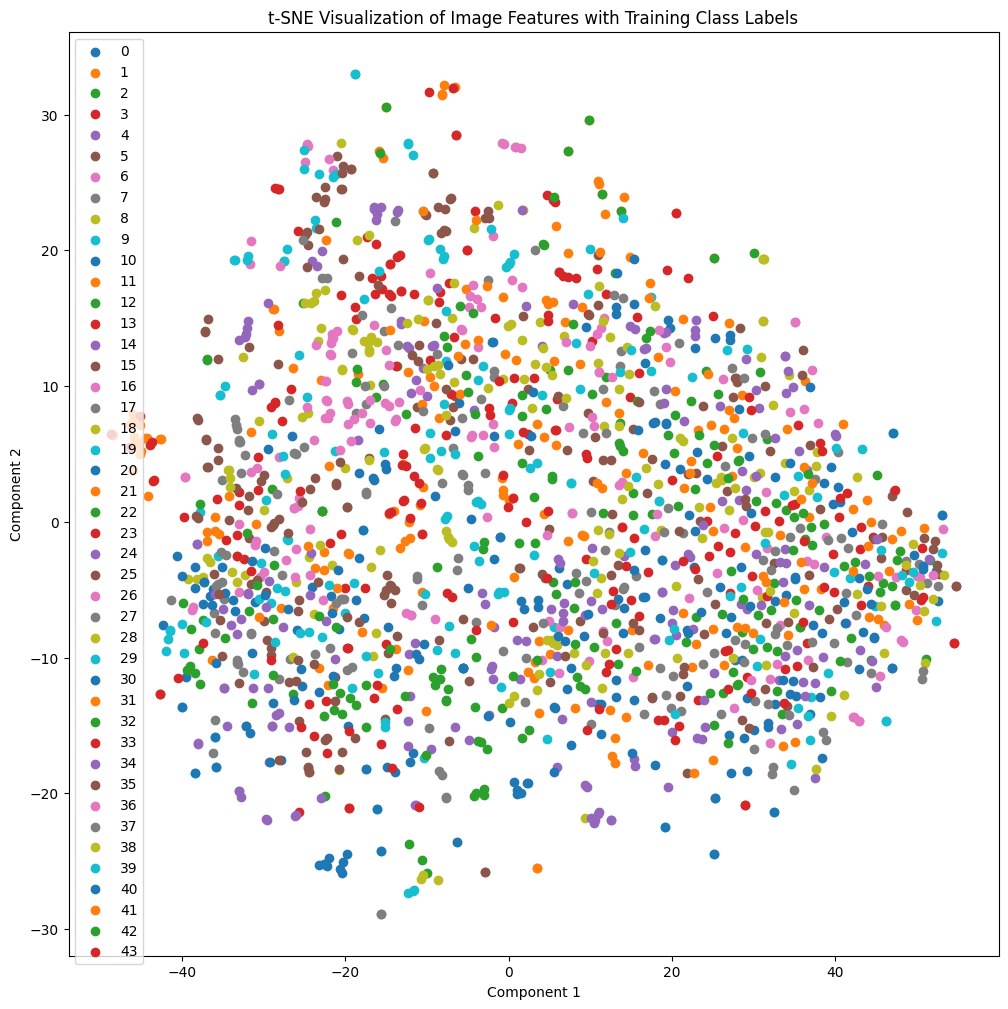

In [ ]:
# Plotting t-SNE features with class labels
plt.figure(figsize=(12, 12))
unique_labels = np.unique(train_labels)
for label in unique_labels:
    plt.scatter(train_tsne_features[train_labels == label, 0], train_tsne_features[train_labels == label, 1], label=label)
plt.title('t-SNE Visualization of Image Features with Training Class Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

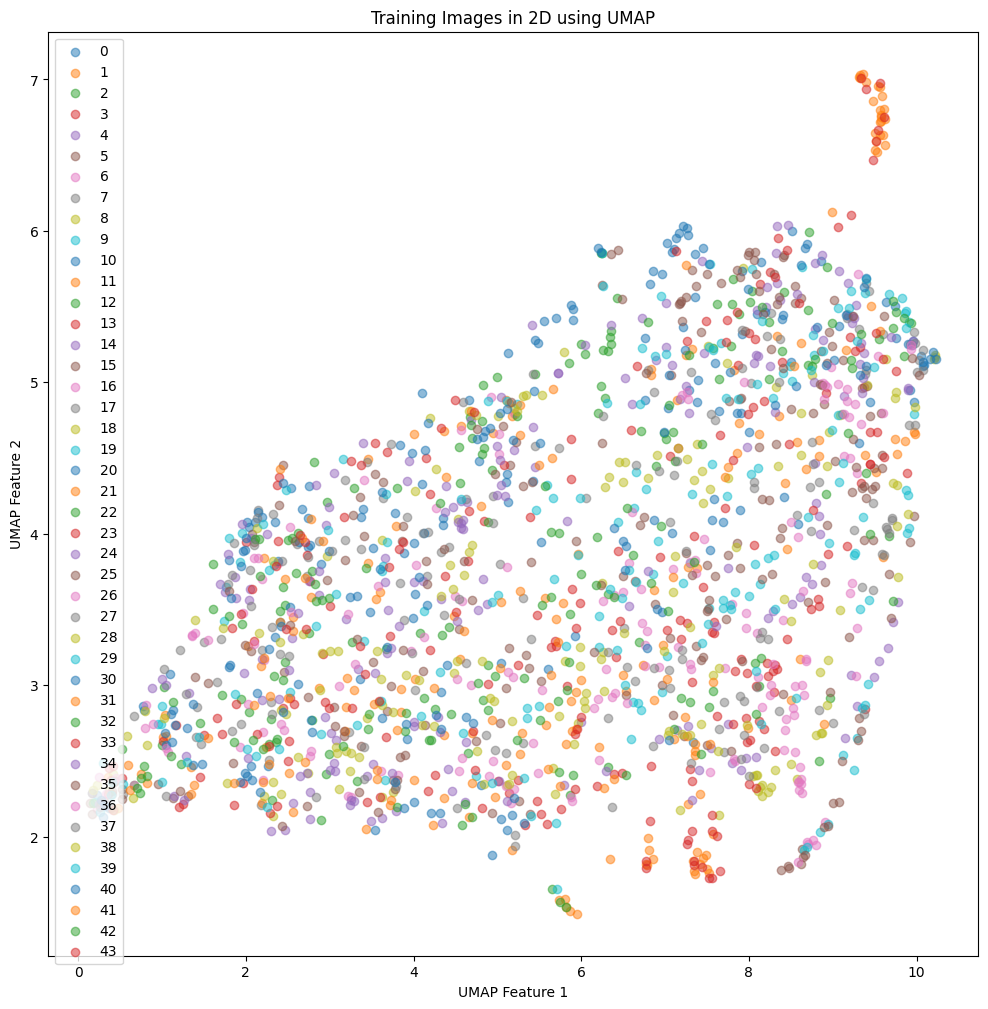

In [ ]:
from umap import UMAP

# Apply UMAP for dimensionality reduction on the scaled training images
umap_reducer = UMAP(n_components=2)
umap_train_features = umap_reducer.fit_transform(scaled_train_images)

# Plotting the UMAP features with class labels
plt.figure(figsize=(12, 12))
for i in np.unique(train_labels):
    indices = np.where(train_labels == i)
    plt.scatter(umap_train_features[indices, 0], umap_train_features[indices, 1], label=i, alpha=0.5)
plt.title('Training Images in 2D using UMAP')
plt.xlabel('UMAP Feature 1')
plt.ylabel('UMAP Feature 2')
plt.legend()
plt.show()


**Clustering based on training labels**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


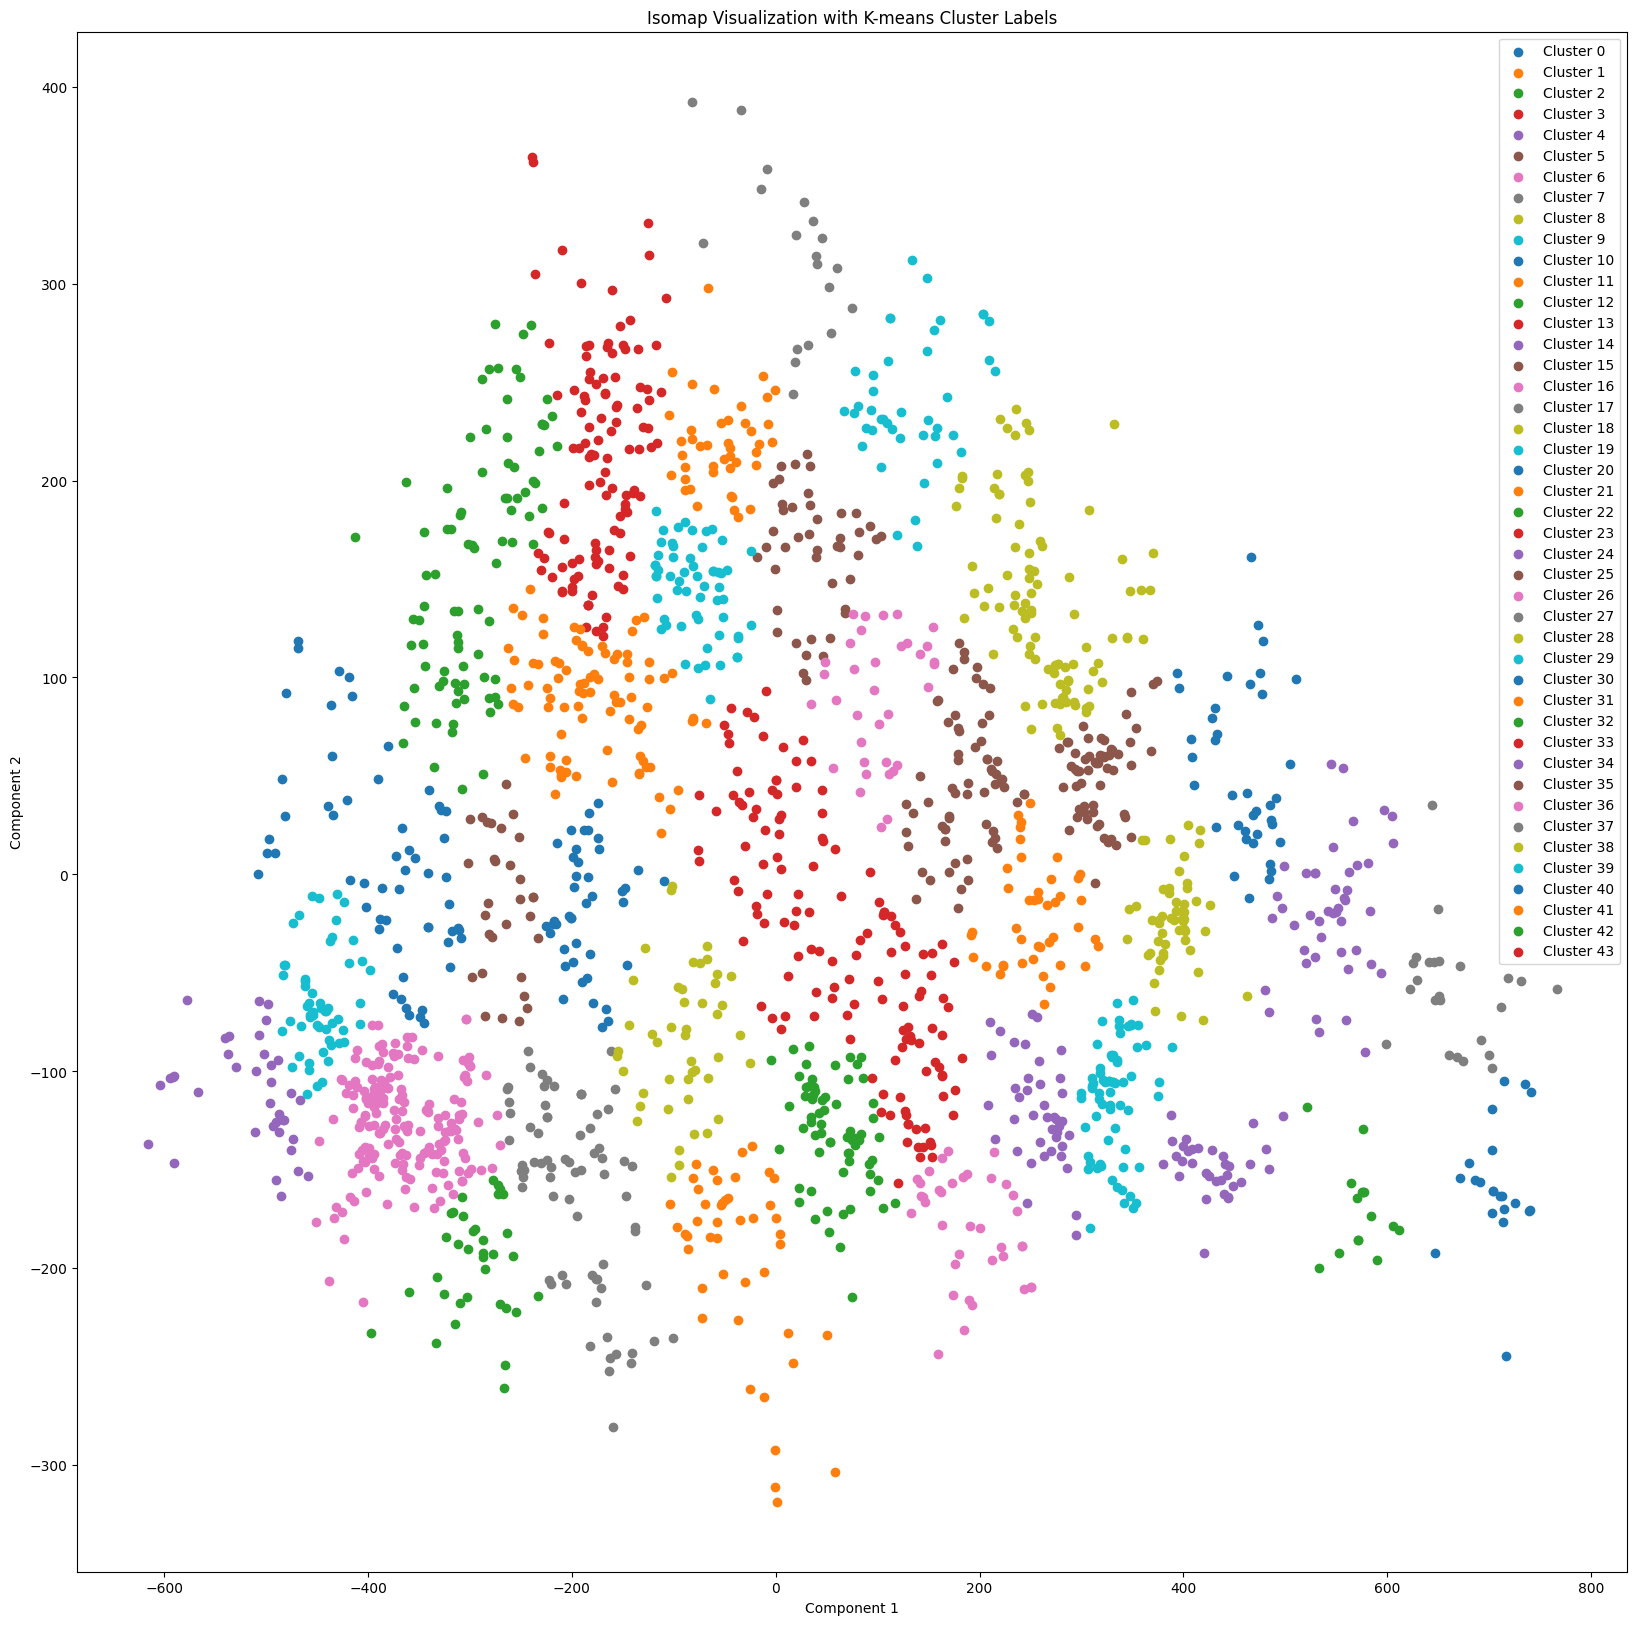

Adjusted Rand Index (ARI): 0.01708467608821821
Normalized Mutual Information (NMI): 0.20646611940878656
Silhouette Score: 0.37356695532798767


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score

# Assuming 'train_isomap_features' and 'train_labels' are available from previous steps

# Number of clusters - adjust based on known classes or desired segmentation
n_clusters = len(np.unique(train_labels))

# Perform K-means clustering on Isomap-reduced features
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(train_isomap_features)

# Evaluate clustering results using true labels (if available)
ari = adjusted_rand_score(train_labels, clusters)
nmi = normalized_mutual_info_score(train_labels, clusters)
silhouette = silhouette_score(train_isomap_features, clusters)

# Plot Isomap features with K-means cluster labels
plt.figure(figsize=(20,20))
for cluster in np.unique(clusters):
    plt.scatter(train_isomap_features[clusters == cluster, 0], train_isomap_features[clusters == cluster, 1], label=f'Cluster {cluster}')
plt.title('Isomap Visualization with K-means Cluster Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Normalized Mutual Information (NMI): {nmi}")
print(f"Silhouette Score: {silhouette}")


In [ ]:
pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.7 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=1d74bf67237d498f1c20312728379a5103707416246d3a906c66c8cbe7db336f
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score
import numpy as np
import pandas as pd
import altair as alt
from umap import UMAP
from sklearn.preprocessing import StandardScaler

# Load training and testing data from numpy arrays
train_images = train_images_array  # Assuming train_images_array is already loaded
test_images = test_images_array    # Assuming test_images_array is already loaded
train_labels = train_labels_array  # Assuming train_labels_array is already loaded
test_labels = test_labels_array    # Assuming test_labels_array is already loaded

# Scale the features
scaler = StandardScaler()
scaled_train_images = scaler.fit_transform(train_images.reshape(len(train_images), -1))
scaled_test_images = scaler.transform(test_images.reshape(len(test_images), -1))

# Apply UMAP for dimensionality reduction on the scaled training images
umap_reducer = UMAP(n_components=2)
umap_train_features = umap_reducer.fit_transform(scaled_train_images)

# Assuming 'train_umap_features' is your UMAP reduced feature representation
X_reduced = umap_train_features  # Replace with your feature set of choice
# Assuming 'train_umap_features' and 'train_labels' are from your UMAP reduction step

# Determine the number of unique classes in your dataset
n_clusters = len(np.unique(train_labels))

# Perform K-means clustering on UMAP-reduced features
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(umap_train_features)

# Evaluate clustering performance using the true labels
ari = adjusted_rand_score(train_labels, clusters)
nmi = normalized_mutual_info_score(train_labels, clusters)
silhouette = silhouette_score(umap_train_features, clusters)

# Convert UMAP features and clusters to DataFrame
df = pd.DataFrame({'UMAP Component 1': umap_train_features[:, 0],
                   'UMAP Component 2': umap_train_features[:, 1],
                   'Cluster': clusters})

# Scatter plot using Altair
scatter_plot = alt.Chart(df).mark_point().encode(
    x='UMAP Component 1',
    y='UMAP Component 2',
    color='Cluster:N'
).properties(
    width=600,
    height=400,
    title='UMAP Visualization with K-means Cluster Labels'
)

# Print clustering performance metrics
print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Normalized Mutual Information (NMI): {nmi}")
print(f"Silhouette Score: {silhouette}")

# Show the Altair scatter plot
scatter_plot


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


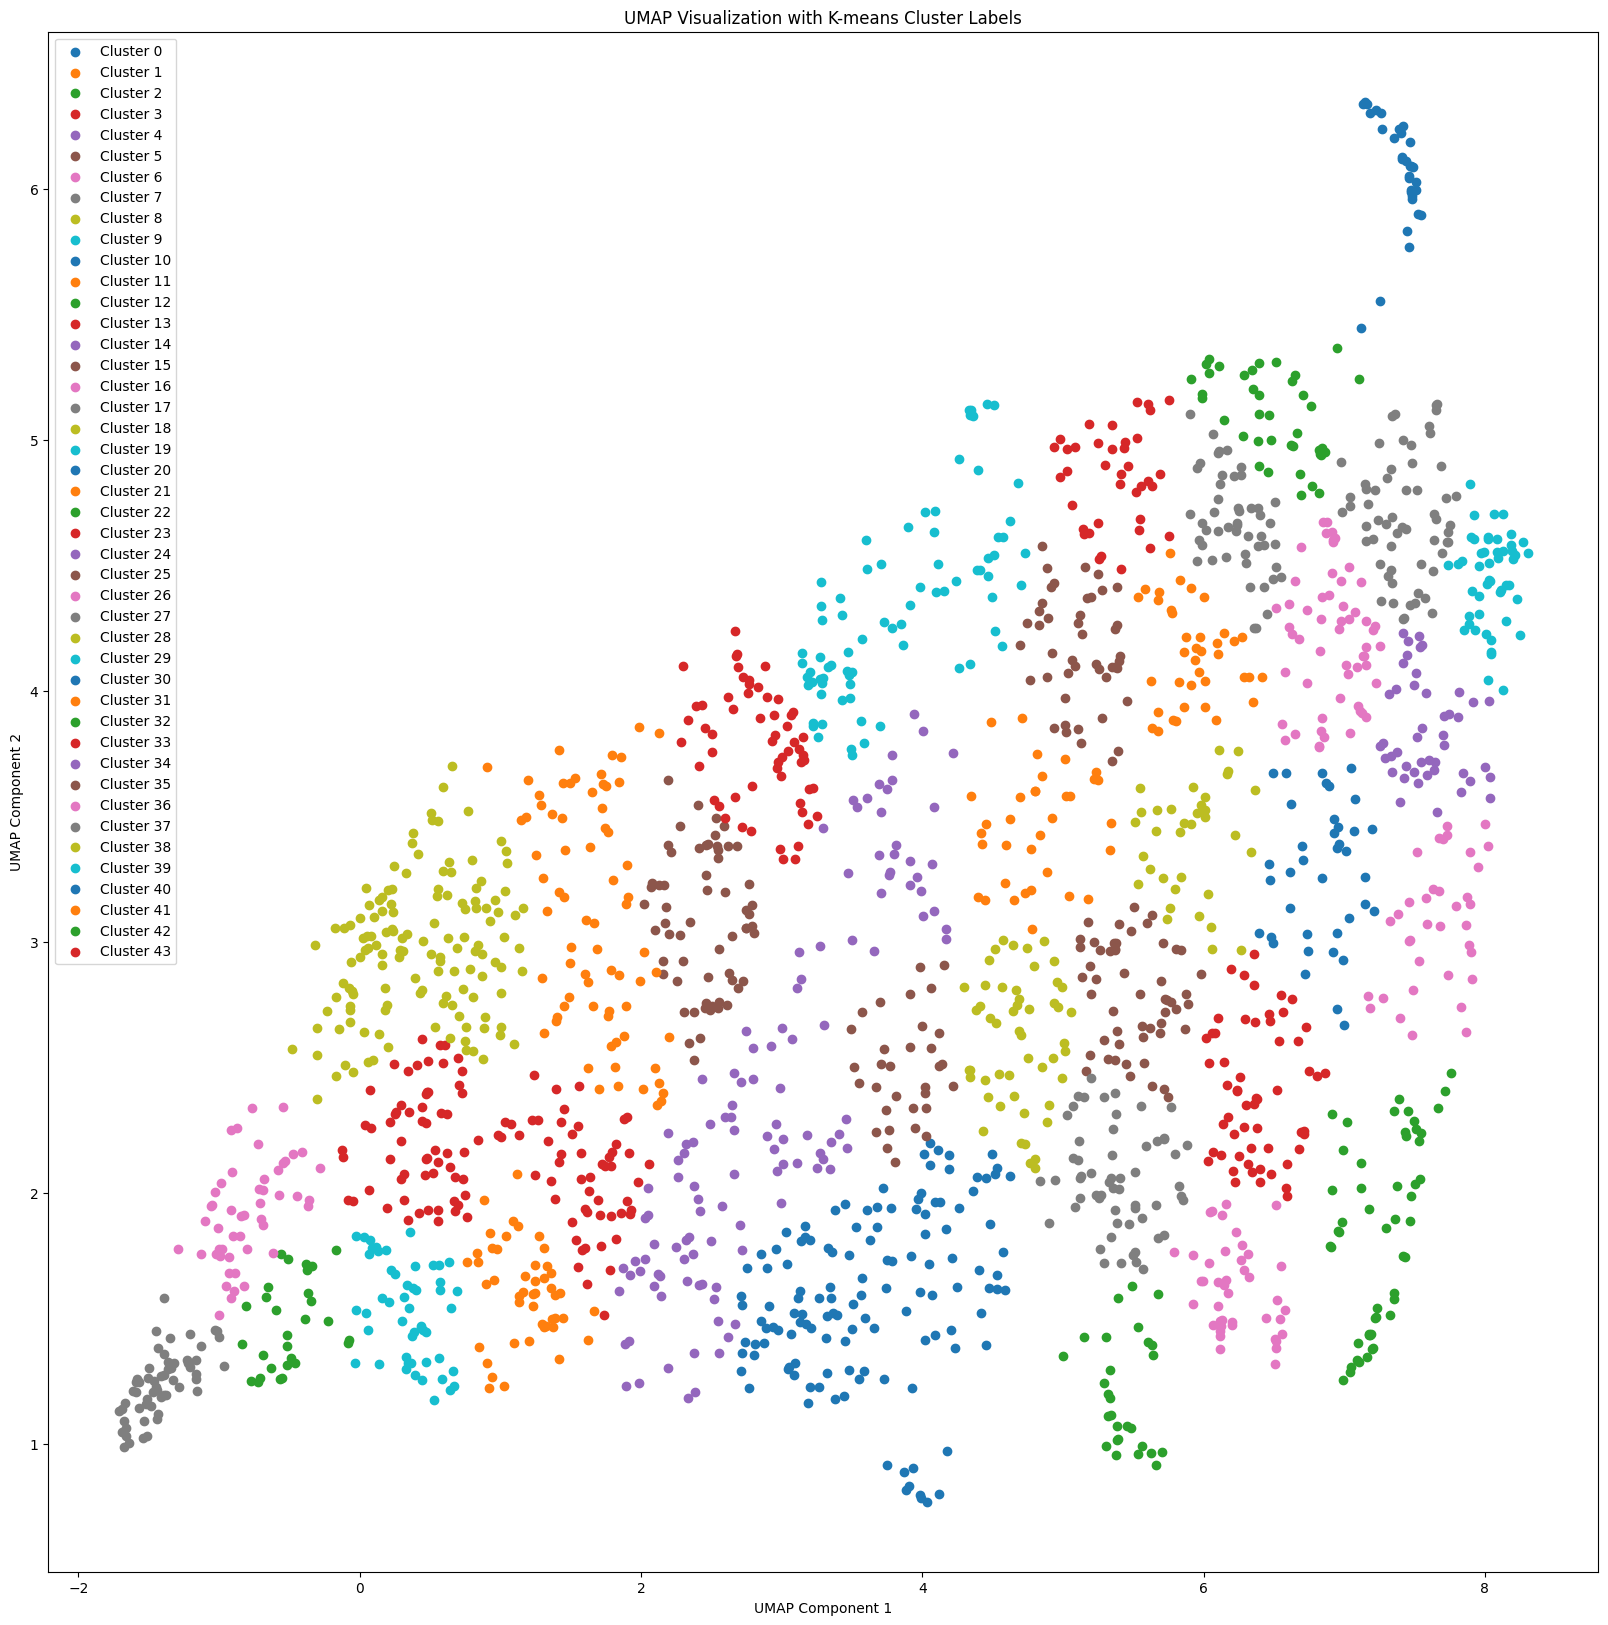

Adjusted Rand Index (ARI): 0.03658896088774512
Normalized Mutual Information (NMI): 0.25220977363579006
Silhouette Score: 0.38027718663215637


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
import matplotlib.pyplot as plt
import numpy as np

from umap import UMAP

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding, TSNE, Isomap
from sklearn.manifold import SpectralEmbedding
from sklearn.preprocessing import StandardScaler

# Load training and testing data from numpy arrays
train_images = train_images_array  # Assuming train_images_array is already loaded
test_images = test_images_array    # Assuming test_images_array is already loaded
train_labels = train_labels_array  # Assuming train_labels_array is already loaded
test_labels = test_labels_array    # Assuming test_labels_array is already loaded

# Scale the features
scaler = StandardScaler()
scaled_train_images = scaler.fit_transform(train_images.reshape(len(train_images), -1))
scaled_test_images = scaler.transform(test_images.reshape(len(test_images), -1))


# Apply UMAP for dimensionality reduction on the scaled training images
umap_reducer = UMAP(n_components=2)
umap_train_features = umap_reducer.fit_transform(scaled_train_images)


# Assuming 'train_umap_features' is your UMAP reduced feature representation
X_reduced = umap_train_features  # Replace with your feature set of choice
# Assuming 'train_umap_features' and 'train_labels' are from your UMAP reduction step

# Determine the number of unique classes in your dataset
n_clusters = len(np.unique(train_labels))

# Perform K-means clustering on UMAP-reduced features
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(umap_train_features)

# Evaluate clustering performance using the true labels
ari = adjusted_rand_score(train_labels, clusters)
nmi = normalized_mutual_info_score(train_labels, clusters)
silhouette = silhouette_score(umap_train_features, clusters)


plt.figure(figsize=(20, 20))
for cluster in np.unique(clusters):
    plt.scatter(umap_train_features[clusters == cluster, 0], umap_train_features[clusters == cluster, 1], label=f'Cluster {cluster}')  # Corrected 'train_umap_features' to 'umap_train_features'
plt.title('UMAP Visualization with K-means Cluster Labels')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend()
plt.show()

# Print clustering performance metrics
print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Normalized Mutual Information (NMI): {nmi}")
print(f"Silhouette Score: {silhouette}")


In [ ]:
import plotly.graph_objects as go

# Clustering scores for UMAP
umap_ari = 0.03658896088774512
umap_nmi = 0.25220977363579006
umap_silhouette = 0.38027718663215637

# Clustering scores for Isomap
isomap_ari = 0.01708467608821821
isomap_nmi = 0.20646611940878656
isomap_silhouette = 0.37356695532798767

# Metrics and corresponding scores
metrics = ['ARI', 'NMI', 'Silhouette']
umap_scores = [umap_ari, umap_nmi, umap_silhouette]
isomap_scores = [isomap_ari, isomap_nmi, isomap_silhouette]

# Create traces for UMAP and Isomap
umap_trace = go.Bar(
    x=metrics,
    y=umap_scores,
    name='UMAP'
)

isomap_trace = go.Bar(
    x=metrics,
    y=isomap_scores,
    name='Isomap'
)

# Create layout
layout = go.Layout(
    title='Clustering Scores: UMAP vs Isomap',
    xaxis=dict(title='Metrics'),
    yaxis=dict(title='Scores')
)

# Create figure
fig = go.Figure(data=[umap_trace, isomap_trace], layout=layout)

# Show plot
fig.show()


**Clustering on pre-defined K values On UMAP Features**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



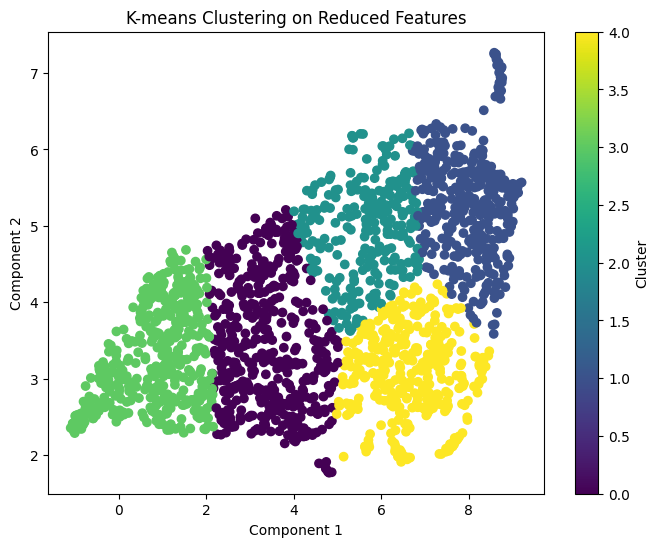

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
import matplotlib.pyplot as plt
import numpy as np

from umap import UMAP

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding, TSNE, Isomap
from sklearn.manifold import SpectralEmbedding
from sklearn.preprocessing import StandardScaler

# Load training and testing data from numpy arrays
train_images = train_images_array  # Assuming train_images_array is already loaded
test_images = test_images_array    # Assuming test_images_array is already loaded
train_labels = train_labels_array  # Assuming train_labels_array is already loaded
test_labels = test_labels_array    # Assuming test_labels_array is already loaded

# Scale the features
scaler = StandardScaler()
scaled_train_images = scaler.fit_transform(train_images.reshape(len(train_images), -1))
scaled_test_images = scaler.transform(test_images.reshape(len(test_images), -1))


# Apply UMAP for dimensionality reduction on the scaled training images
umap_reducer = UMAP(n_components=2)
umap_train_features = umap_reducer.fit_transform(scaled_train_images)


# Assuming 'train_umap_features' is your UMAP reduced feature representation
X_reduced = umap_train_features  # Replace with your feature set of choice

# Apply K-means clustering
kmeans = KMeans(n_clusters=5)  # Adjust based on the number of classes
kmeans_clusters = kmeans.fit_predict(X_reduced)

# Plot K-means clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title('K-means Clustering on Reduced Features')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score

# Assuming 'train_labels' are the true class labels and 'kmeans_clusters' are the K-means cluster assignments

ari_kmeans = adjusted_rand_score(train_labels, kmeans_clusters)
nmi_kmeans = normalized_mutual_info_score(train_labels, kmeans_clusters)
silhouette_kmeans = silhouette_score(X_reduced, kmeans_clusters)

print("K-means Clustering Metrics:")
print("Adjusted Rand Index (ARI):", ari_kmeans)
print("Normalized Mutual Information (NMI):", nmi_kmeans)
print("Silhouette Score:", silhouette_kmeans)


K-means Clustering Metrics:
Adjusted Rand Index (ARI): 0.013495687263107297
Normalized Mutual Information (NMI): 0.07955706610115347
Silhouette Score: 0.41602528


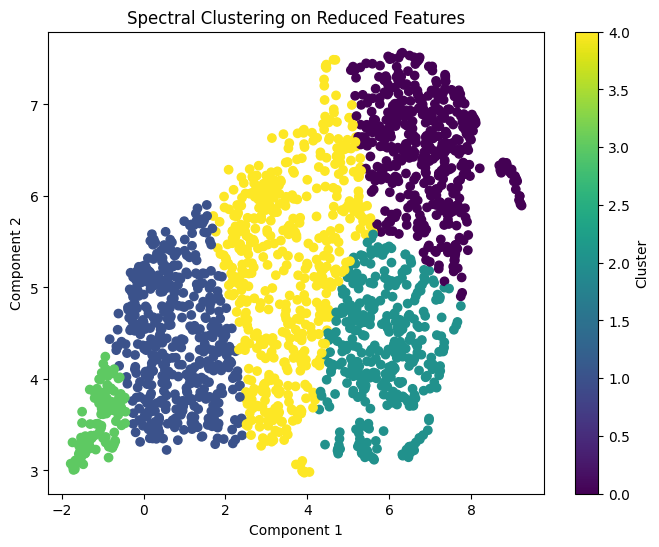

In [ ]:
# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=5)  # Adjust based on the number of classes
spectral_clusters = spectral.fit_predict(X_reduced)

# Plot Spectral Clustering clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=spectral_clusters, cmap='viridis')
plt.title('Spectral Clustering on Reduced Features')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score

# Assuming 'train_labels' are the true class labels and 'spectral_clusters' are the Spectral Clustering assignments

ari_spectral = adjusted_rand_score(train_labels, spectral_clusters)
nmi_spectral = normalized_mutual_info_score(train_labels, spectral_clusters)
silhouette_spectral = silhouette_score(X_reduced, spectral_clusters)

print("Spectral Clustering Metrics:")
print("Adjusted Rand Index (ARI):", ari_spectral)
print("Normalized Mutual Information (NMI):", nmi_spectral)
print("Silhouette Score:", silhouette_spectral)


Spectral Clustering Metrics:
Adjusted Rand Index (ARI): 0.012266067428302442
Normalized Mutual Information (NMI): 0.07298626940084912
Silhouette Score: 0.3805717


In [ ]:
import plotly.graph_objects as go

# Define the clustering methods and their corresponding scores
methods = ['K-means', 'Spectral']
ari_scores = [ari_kmeans, ari_spectral]
nmi_scores = [nmi_kmeans, nmi_spectral]
silhouette_scores = [silhouette_kmeans, silhouette_spectral]

# Create a bar plot for each metric
fig = go.Figure(data=[
    go.Bar(name='Adjusted Rand Index (ARI)', x=methods, y=ari_scores),
    go.Bar(name='Normalized Mutual Information (NMI)', x=methods, y=nmi_scores),
    go.Bar(name='Silhouette Score', x=methods, y=silhouette_scores)
])

# Update the layout
fig.update_layout(barmode='group', title='Clustering Metrics Comparison',
                  xaxis=dict(title='Clustering Method'), yaxis=dict(title='Score'))

# Show the plot
fig.show()


**SUPERVISED LEARNING**

**Trying Classifiers for classification**

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Directory containing the images
directory = "/content/drive/MyDrive/content/new_gscaled"

# Setup data generator without rescaling pixel values
datagen = tf.keras.preprocessing.image.ImageDataGenerator()

# Setup generator for the entire dataset
generator = datagen.flow_from_directory(
    directory,
    target_size=(100, 100),  # Assuming the images are already resized
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Manually resize images after loading them
resized_batches = []
for _ in range(len(generator)):
    images, labels = next(generator)
    resized_batches.append((images, labels))

# Convert one-hot encoded labels to class indices
all_images = []
all_labels = []
for batch in resized_batches:
    images, labels = batch
    all_images.extend(images)
    all_labels.extend(np.argmax(labels, axis=1))

# Split data into stratified training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    all_images, all_labels, stratify=all_labels, test_size=0.2, random_state=42)

# Convert resized batches into NumPy arrays
train_images_array = np.array(train_images)
test_images_array = np.array(test_images)
train_labels_array = np.array(train_labels)
test_labels_array = np.array(test_labels)

# Scale the features
scaler = StandardScaler()
scaled_train_images = scaler.fit_transform(train_images_array.reshape(len(train_images_array), -1))
scaled_test_images = scaler.transform(test_images_array.reshape(len(test_images_array), -1))

# Train Naive Bayes classifier
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(scaled_train_images, train_labels_array)

# Evaluate Naive Bayes classifier
train_predictions = naive_bayes_classifier.predict(scaled_train_images)
test_predictions = naive_bayes_classifier.predict(scaled_test_images)

# Evaluate Naive Bayes classifier
train_predictions = naive_bayes_classifier.predict(scaled_train_images)
test_predictions = naive_bayes_classifier.predict(scaled_test_images)

# Calculate evaluation metrics
train_accuracy = accuracy_score(train_labels_array, train_predictions)
test_accuracy = accuracy_score(test_labels_array, test_predictions)
train_report = classification_report(train_labels_array, train_predictions)
test_report = classification_report(test_labels_array, test_predictions)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("\nTrain Classification Report:\n", train_report)
print("\nTest Classification Report:\n", test_report)




Found 2454 images belonging to 44 classes.
Train Accuracy: 0.27101375445746306
Test Accuracy: 0.1955193482688391

Train Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.17      0.19        35
           1       0.62      0.11      0.18        47
           2       0.50      0.08      0.13        26
           3       0.32      0.38      0.35        47
           4       0.15      0.71      0.25        34
           5       0.75      0.06      0.11        51
           6       0.50      0.09      0.16        32
           7       0.11      0.52      0.18        42
           8       0.62      0.18      0.28        72
           9       0.40      0.11      0.17        38
          10       0.48      0.57      0.52        53
          11       0.37      0.27      0.31        26
          12       0.51      0.33      0.40        58
          13       1.00      0.02      0.04        56
          14       0.69      0.15      0.24  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Directory containing the images
directory = "/content/drive/MyDrive/content/new_gscaled"

# Setup data generator without rescaling pixel values
datagen = tf.keras.preprocessing.image.ImageDataGenerator()

# Setup generator for the entire dataset
generator = datagen.flow_from_directory(
    directory,
    target_size=(100, 100),  # Assuming the images are already resized
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Manually resize images after loading them
resized_batches = []
for _ in range(len(generator)):
    images, labels = next(generator)
    resized_batches.append((images, labels))

# Convert one-hot encoded labels to class indices
all_images = []
all_labels = []
for batch in resized_batches:
    images, labels = batch
    all_images.extend(images)
    all_labels.extend(np.argmax(labels, axis=1))

# Split data into stratified training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    all_images, all_labels, stratify=all_labels, test_size=0.2, random_state=42)

# Convert resized batches into NumPy arrays
train_images_array = np.array(train_images)
test_images_array = np.array(test_images)
train_labels_array = np.array(train_labels)
test_labels_array = np.array(test_labels)

# Scale the features
scaler = StandardScaler()
scaled_train_images = scaler.fit_transform(train_images_array.reshape(len(train_images_array), -1))
scaled_test_images = scaler.transform(test_images_array.reshape(len(test_images_array), -1))

# Train Random Forest classifier
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(scaled_train_images, train_labels_array)

# Evaluate Random Forest classifier
train_predictions = random_forest_classifier.predict(scaled_train_images)
test_predictions = random_forest_classifier.predict(scaled_test_images)

# Calculate evaluation metrics
train_accuracy = accuracy_score(train_labels_array, train_predictions)
test_accuracy = accuracy_score(test_labels_array, test_predictions)
train_report = classification_report(train_labels_array, train_predictions)
test_report = classification_report(test_labels_array, test_predictions)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("\nTrain Classification Report:\n", train_report)
print("\nTest Classification Report:\n", test_report)


Found 2454 images belonging to 44 classes.
Train Accuracy: 0.9872643912379012
Test Accuracy: 0.3340122199592668

Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        34
           5       1.00      1.00      1.00        51
           6       0.97      1.00      0.98        32
           7       1.00      1.00      1.00        42
           8       1.00      1.00      1.00        72
           9       1.00      1.00      1.00        38
          10       0.98      1.00      0.99        53
          11       1.00      1.00      1.00        26
          12       0.98      0.98      0.98        58
          13       1.00      1.00      1.00        56
          14       1.00      1.00      1.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Directory containing the images
directory = "/content/drive/MyDrive/content/new_gscaled"

# Setup data generator without rescaling pixel values
datagen = tf.keras.preprocessing.image.ImageDataGenerator()

# Setup generator for the entire dataset
generator = datagen.flow_from_directory(
    directory,
    target_size=(100, 100),  # Assuming the images are already resized
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Manually resize images after loading them
resized_batches = []
for _ in range(len(generator)):
    images, labels = next(generator)
    resized_batches.append((images, labels))

# Convert one-hot encoded labels to class indices
all_images = []
all_labels = []
for batch in resized_batches:
    images, labels = batch
    all_images.extend(images)
    all_labels.extend(np.argmax(labels, axis=1))

# Split data into stratified training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    all_images, all_labels, stratify=all_labels, test_size=0.2, random_state=42)

# Convert resized batches into NumPy arrays
train_images_array = np.array(train_images)
test_images_array = np.array(test_images)
train_labels_array = np.array(train_labels)
test_labels_array = np.array(test_labels)

# Scale the features
scaler = StandardScaler()
scaled_train_images = scaler.fit_transform(train_images_array.reshape(len(train_images_array), -1))
scaled_test_images = scaler.transform(test_images_array.reshape(len(test_images_array), -1))

# Train SVM classifier
svm_classifier = SVC()
svm_classifier.fit(scaled_train_images, train_labels_array)

# Evaluate SVM classifier
train_predictions = svm_classifier.predict(scaled_train_images)
test_predictions = svm_classifier.predict(scaled_test_images)

# Calculate evaluation metrics
train_accuracy = accuracy_score(train_labels_array, train_predictions)
test_accuracy = accuracy_score(test_labels_array, test_predictions)
train_report = classification_report(train_labels_array, train_predictions)
test_report = classification_report(test_labels_array, test_predictions)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("\nTrain Classification Report:\n", train_report)
print("\nTest Classification Report:\n", test_report)


Found 2454 images belonging to 44 classes.
Train Accuracy: 0.7784004075394804
Test Accuracy: 0.3564154786150713

Train Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.63      0.69        35
           1       0.68      0.77      0.72        47
           2       1.00      0.35      0.51        26
           3       0.81      0.83      0.82        47
           4       0.93      0.76      0.84        34
           5       0.81      0.75      0.78        51
           6       1.00      0.66      0.79        32
           7       0.61      0.83      0.71        42
           8       0.66      0.89      0.76        72
           9       0.94      0.76      0.84        38
          10       0.88      0.94      0.91        53
          11       1.00      0.54      0.70        26
          12       0.59      0.95      0.73        58
          13       0.85      0.79      0.81        56
          14       0.74      0.94      0.83   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**RUNNING CNN PRE TRAINED MODELS**

**CNN MODEL**

Found 2454 images belonging to 44 classes.
Epoch 1/20
62/62 [==============================] - 38s 596ms/step - loss: 3.7741 - accuracy: 0.0377 - val_loss: 3.7566 - val_accuracy: 0.0570
Epoch 2/20
62/62 [==============================] - 40s 644ms/step - loss: 3.6217 - accuracy: 0.0815 - val_loss: 3.3264 - val_accuracy: 0.1507
Epoch 3/20
62/62 [==============================] - 35s 571ms/step - loss: 3.1092 - accuracy: 0.2002 - val_loss: 2.8757 - val_accuracy: 0.2953
Epoch 4/20
62/62 [==============================] - 36s 584ms/step - loss: 2.5517 - accuracy: 0.3423 - val_loss: 2.5121 - val_accuracy: 0.3768
Epoch 5/20
62/62 [==============================] - 37s 596ms/step - loss: 2.0857 - accuracy: 0.4386 - val_loss: 2.4323 - val_accuracy: 0.3971
Epoch 6/20
62/62 [==============================] - 35s 573ms/step - loss: 1.7486 - accuracy: 0.5201 - val_loss: 2.2783 - val_accuracy: 0.4481
Epoch 7/20
62/62 [==============================] - 42s 675ms/step - loss: 1.3756 - accuracy: 0.612

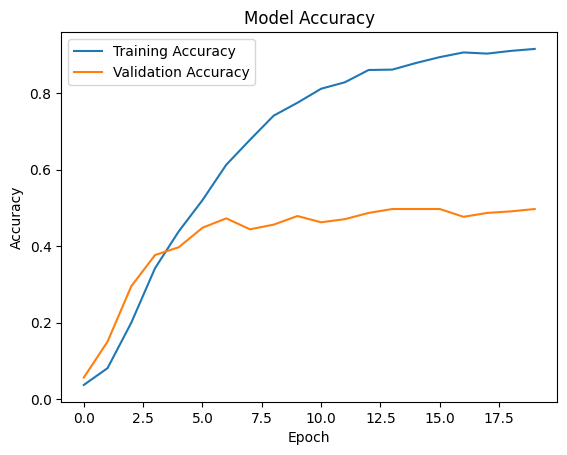

16/16 [==============================] - 2s 138ms/step - loss: 2.7378 - accuracy: 0.4969
Test Loss: 2.737837791442871
Test Accuracy: 0.49694502353668213
16/16 [==============================] - 3s 203ms/step
Precision: 0.5130113683786608
Recall: 0.4969450101832994
F1 Score: 0.4908825830964038
Confusion Matrix:
[[4 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 1 0 ... 5 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 1]]


In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Directory containing the images
directory = "/content/drive/MyDrive/content/new_gscaled"

# Setup data generator without rescaling pixel values
datagen = tf.keras.preprocessing.image.ImageDataGenerator()

# Setup generator for the entire dataset
generator = datagen.flow_from_directory(
    directory,
    target_size=(100, 100),  # Assuming the images are already resized
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Manually resize images after loading them
resized_batches = []
for _ in range(len(generator)):
    images, labels = next(generator)
    resized_batches.append((images, labels))

# Convert one-hot encoded labels to class indices
all_images = []
all_labels = []
for batch in resized_batches:
    images, labels = batch
    all_images.extend(images)
    all_labels.extend(np.argmax(labels, axis=1))

# Split data into stratified training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    all_images, all_labels, stratify=all_labels, test_size=0.2, random_state=42)

# Convert resized batches into NumPy arrays
train_images_array = np.array(train_images)
test_images_array = np.array(test_images)
train_labels_array = np.array(train_labels)
test_labels_array = np.array(test_labels)

# Normalize pixel values to be between 0 and 1
train_images_array = train_images_array / 255.0
test_images_array = test_images_array / 255.0

# Define CNN model architecture
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(44, activation='softmax')  # Assuming 44 classes
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1)

# Train the model
history = cnn_model.fit(train_images_array, train_labels_array, epochs=20, validation_data=(test_images_array, test_labels_array))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = cnn_model.evaluate(test_images_array, test_labels_array)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Make predictions
predictions = cnn_model.predict(test_images_array)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Calculate additional evaluation metrics
precision = precision_score(test_labels_array, predicted_labels, average='weighted')
recall = recall_score(test_labels_array, predicted_labels, average='weighted')
f1 = f1_score(test_labels_array, predicted_labels, average='weighted')
conf_matrix = confusion_matrix(test_labels_array, predicted_labels)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)



**MobileNetV2 MODEL**

Found 2454 images belonging to 44 classes.
Epoch 1/20
62/62 [==============================] - 53s 788ms/step - loss: 3.7752 - accuracy: 0.0321 - val_loss: 3.7466 - val_accuracy: 0.0407
Epoch 2/20
62/62 [==============================] - 42s 682ms/step - loss: 3.6534 - accuracy: 0.0734 - val_loss: 3.4119 - val_accuracy: 0.1385
Epoch 3/20
62/62 [==============================] - 44s 715ms/step - loss: 3.2228 - accuracy: 0.1707 - val_loss: 2.8702 - val_accuracy: 0.2933
Epoch 4/20
62/62 [==============================] - 54s 874ms/step - loss: 2.6806 - accuracy: 0.3011 - val_loss: 2.5389 - val_accuracy: 0.3625
Epoch 5/20
62/62 [==============================] - 50s 811ms/step - loss: 2.2854 - accuracy: 0.3877 - val_loss: 2.3814 - val_accuracy: 0.4175
Epoch 6/20
62/62 [==============================] - 58s 926ms/step - loss: 1.8916 - accuracy: 0.4906 - val_loss: 2.2738 - val_accuracy: 0.4277
Epoch 7/20
62/62 [==============================] - 53s 857ms/step - loss: 1.5608 - accuracy: 0.565

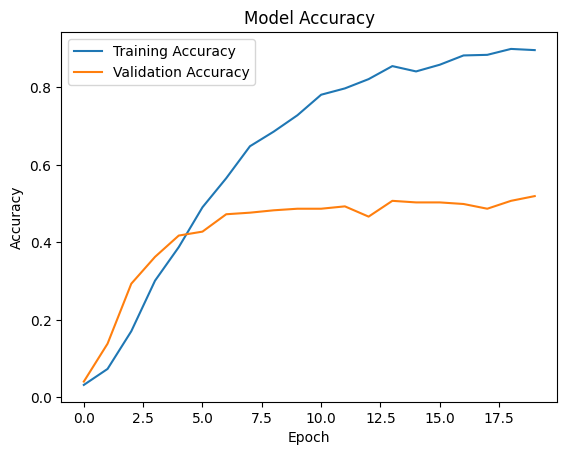

16/16 [==============================] - 2s 138ms/step - loss: 2.6823 - accuracy: 0.5193
Test Loss: 2.682339668273926
Test Accuracy: 0.5193482637405396
16/16 [==============================] - 2s 138ms/step
Precision: 0.5386243487088103
Recall: 0.5193482688391039
F1 Score: 0.5114575685331648
Confusion Matrix:
[[8 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 1]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [1 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Directory containing the images
directory = "/content/drive/MyDrive/content/new_gscaled"

# Setup data generator without rescaling pixel values
datagen = tf.keras.preprocessing.image.ImageDataGenerator()

# Setup generator for the entire dataset
generator = datagen.flow_from_directory(
    directory,
    target_size=(100, 100),  # Assuming the images are already resized
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Manually resize images after loading them
resized_batches = []
for _ in range(len(generator)):
    images, labels = next(generator)
    resized_batches.append((images, labels))

# Convert one-hot encoded labels to class indices
all_images = []
all_labels = []
for batch in resized_batches:
    images, labels = batch
    all_images.extend(images)
    all_labels.extend(np.argmax(labels, axis=1))

# Split data into stratified training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    all_images, all_labels, stratify=all_labels, test_size=0.2, random_state=42)

# Convert resized batches into NumPy arrays
train_images_array = np.array(train_images)
test_images_array = np.array(test_images)
train_labels_array = np.array(train_labels)
test_labels_array = np.array(test_labels)

# Normalize pixel values to be between 0 and 1
train_images_array = train_images_array / 255.0
test_images_array = test_images_array / 255.0

# Define CNN model architecture
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(44, activation='softmax')  # Assuming 44 classes
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1)

# Train the model
history = cnn_model.fit(train_images_array, train_labels_array, epochs=20, validation_data=(test_images_array, test_labels_array))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = cnn_model.evaluate(test_images_array, test_labels_array)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Make predictions
predictions = cnn_model.predict(test_images_array)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Calculate additional evaluation metrics
precision = precision_score(test_labels_array, predicted_labels, average='weighted')
recall = recall_score(test_labels_array, predicted_labels, average='weighted')
f1 = f1_score(test_labels_array, predicted_labels, average='weighted')
conf_matrix = confusion_matrix(test_labels_array, predicted_labels)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)


**DENSENET MODEL**

1/1 [==============================] - 0s 60ms/step
Epoch 1/10
7/7 [==============================] - 1s 43ms/step - loss: 2.7200 - accuracy: 0.4569 - val_loss: 1.4603 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 0s 16ms/step - loss: 0.3122 - accuracy: 0.8985 - val_loss: 0.7386 - val_accuracy: 0.8182
Epoch 3/10
7/7 [==============================] - 0s 16ms/step - loss: 0.1314 - accuracy: 0.9645 - val_loss: 0.4222 - val_accuracy: 0.9091
Epoch 4/10
7/7 [==============================] - 0s 17ms/step - loss: 0.0533 - accuracy: 0.9848 - val_loss: 0.3991 - val_accuracy: 0.9545
Epoch 5/10
7/7 [==============================] - 0s 19ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.5387 - val_accuracy: 0.8636
Epoch 6/10
7/7 [==============================] - 0s 13ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.5242 - val_accuracy: 0.9091
Epoch 7/10
7/7 [==============================] - 0s 16ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.397

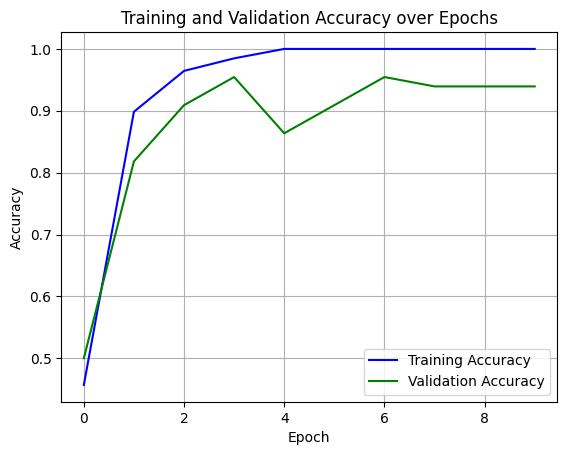

3/3 [==============================] - 0s 5ms/step - loss: 0.3732 - accuracy: 0.9394
Test Loss: 0.3732295036315918
Test Accuracy: 0.939393937587738
3/3 [==============================] - 0s 5ms/step
Precision: 0.9415584415584415
Recall: 0.9393939393939394
F1 Score: 0.9399551066217733
Confusion Matrix:
[[15  0  0  0  0]
 [ 0 12  0  1  0]
 [ 0  0  9  0  0]
 [ 0  2  0 13  0]
 [ 0  0  0  1 13]]


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input as preprocess_input_densenet
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Directory containing your images
image_dir = "/content/drive/MyDrive/content/grayscaled"

# Load pre-trained DenseNet121 model
densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(100,100, 3))

# Function to extract features from images using DenseNet121
def extract_features_densenet(img_path):
    img = image.load_img(img_path, target_size=(100, 100))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_densenet(x)
    features = densenet_model.predict(x)
    features_flattened = features.flatten()
    return features_flattened

# List to store paths of all images
all_image_paths = []
# List to store ground truth labels
all_ground_truth_labels = []

# Iterate over images in the directory
for class_label in os.listdir(image_dir):
    class_dir = os.path.join(image_dir, class_label)
    if os.path.isdir(class_dir):
        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            all_image_paths.append(file_path)
            all_ground_truth_labels.append(class_label)

# Convert lists to numpy arrays
all_ground_truth_labels = np.array(all_ground_truth_labels)

# List to store features of all images
all_densenet_features = []

# Extract features from images using DenseNet121
for img_path in all_image_paths:
    densenet_features = extract_features_densenet(img_path)
    all_densenet_features.append(densenet_features)

# Convert lists to numpy arrays
all_densenet_features = np.array(all_densenet_features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_densenet_features, all_ground_truth_labels, test_size=0.25, random_state=42)

# Convert labels to numerical format
label_to_index = {label: i for i, label in enumerate(np.unique(all_ground_truth_labels))}
y_train_numeric = np.array([label_to_index[label] for label in y_train])
y_test_numeric = np.array([label_to_index[label] for label in y_test])

# Build a simple fully connected neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(label_to_index), activation='softmax') # Adjust output units
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with numeric labels
history = model.fit(X_train, y_train_numeric, epochs=10, batch_size=32, validation_data=(X_test, y_test_numeric))

# Obtain training history
history_dict = history.history

# Extract accuracy and loss values
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Plot training and validation accuracy
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='green')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_numeric)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Calculate additional evaluation metrics
predicted_labels = np.argmax(model.predict(X_test), axis=-1)
precision = precision_score(y_test_numeric, predicted_labels, average='weighted')
recall = recall_score(y_test_numeric, predicted_labels, average='weighted')
f1 = f1_score(y_test_numeric, predicted_labels, average='weighted')
conf_matrix = confusion_matrix(y_test_numeric, predicted_labels)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)


**RESNET MODEL**

1/1 [==============================] - 0s 85ms/step
Epoch 1/10
7/7 [==============================] - 2s 64ms/step - loss: 3.1400 - accuracy: 0.5279 - val_loss: 2.0620 - val_accuracy: 0.7879
Epoch 2/10
7/7 [==============================] - 0s 35ms/step - loss: 0.5216 - accuracy: 0.9036 - val_loss: 0.8865 - val_accuracy: 0.8788
Epoch 3/10
7/7 [==============================] - 0s 34ms/step - loss: 0.1547 - accuracy: 0.9594 - val_loss: 1.1164 - val_accuracy: 0.8939
Epoch 4/10
7/7 [==============================] - 0s 34ms/step - loss: 0.0268 - accuracy: 0.9898 - val_loss: 0.6709 - val_accuracy: 0.9394
Epoch 5/10
7/7 [==============================] - 0s 34ms/step - loss: 0.0044 - accuracy: 0.9949 - val_loss: 0.6510 - val_accuracy: 0.9394
Epoch 6/10
7/7 [==============================] - 0s 37ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.5698 - val_accuracy: 0.9545
Epoch 7/10
7/7 [==============================] - 0s 34ms/step - loss: 8.5302e-05 - accuracy: 1.0000 - val_loss: 0

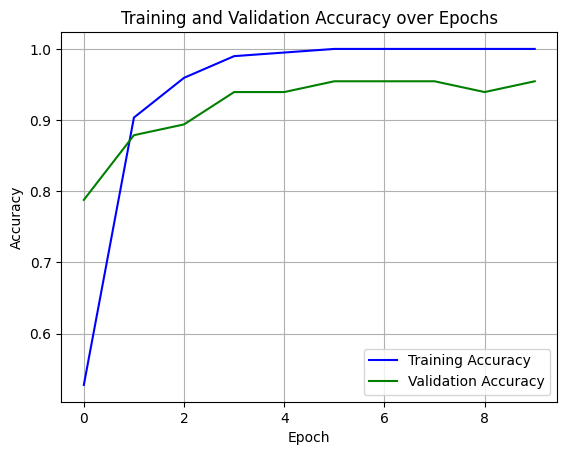

3/3 [==============================] - 0s 9ms/step - loss: 0.5306 - accuracy: 0.9545
Test Loss: 0.5306059718132019
Test Accuracy: 0.9545454382896423
3/3 [==============================] - 0s 6ms/step
Precision: 0.956060606060606
Recall: 0.9545454545454546
F1 Score: 0.9546829456085355
Confusion Matrix:
[[14  0  1  0  0]
 [ 0 13  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  0 14  1]
 [ 0  0  0  1 13]]


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_input_resnet
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Directory containing your images
image_dir = "/content/drive/MyDrive/content/grayscaled"

# Load pre-trained ResNet50 model
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(100,100, 3))

# Function to extract features from images using ResNet50
def extract_features_resnet(img_path):
    img = image.load_img(img_path, target_size=(100, 100))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_resnet(x)
    features = resnet_model.predict(x)
    features_flattened = features.flatten()
    return features_flattened

# List to store paths of all images
all_image_paths = []
# List to store ground truth labels
all_ground_truth_labels = []

# Iterate over images in the directory
for class_label in os.listdir(image_dir):
    class_dir = os.path.join(image_dir, class_label)
    if os.path.isdir(class_dir):
        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            all_image_paths.append(file_path)
            all_ground_truth_labels.append(class_label)

# Convert lists to numpy arrays
all_ground_truth_labels = np.array(all_ground_truth_labels)

# List to store features of all images
all_resnet_features = []

# Extract features from images using ResNet50
for img_path in all_image_paths:
    resnet_features = extract_features_resnet(img_path)
    all_resnet_features.append(resnet_features)

# Convert lists to numpy arrays
all_resnet_features = np.array(all_resnet_features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_resnet_features, all_ground_truth_labels, test_size=0.25, random_state=42)

# Convert labels to numerical format
label_to_index = {label: i for i, label in enumerate(np.unique(all_ground_truth_labels))}
y_train_numeric = np.array([label_to_index[label] for label in y_train])
y_test_numeric = np.array([label_to_index[label] for label in y_test])

# Build a simple fully connected neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(label_to_index), activation='softmax') # Adjust output units
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with numeric labels
history = model.fit(X_train, y_train_numeric, epochs=10, batch_size=32, validation_data=(X_test, y_test_numeric))

# Obtain training history
history_dict = history.history

# Extract accuracy and loss values
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Plot training and validation accuracy
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='green')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_numeric)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Calculate additional evaluation metrics
predicted_labels = np.argmax(model.predict(X_test), axis=-1)
precision = precision_score(y_test_numeric, predicted_labels, average='weighted')
recall = recall_score(y_test_numeric, predicted_labels, average='weighted')
f1 = f1_score(y_test_numeric, predicted_labels, average='weighted')
conf_matrix = confusion_matrix(y_test_numeric, predicted_labels)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)


**VGG19 MODEL**

1/1 [==============================] - 0s 242ms/step
Epoch 1/10
7/7 [==============================] - 2s 68ms/step - loss: 4.7064 - accuracy: 0.5228 - val_loss: 0.9427 - val_accuracy: 0.7879
Epoch 2/10
7/7 [==============================] - 0s 22ms/step - loss: 0.2591 - accuracy: 0.9188 - val_loss: 0.6616 - val_accuracy: 0.8788
Epoch 3/10
7/7 [==============================] - 0s 21ms/step - loss: 0.0293 - accuracy: 0.9898 - val_loss: 0.6447 - val_accuracy: 0.8788
Epoch 4/10
7/7 [==============================] - 0s 20ms/step - loss: 7.5353e-04 - accuracy: 1.0000 - val_loss: 0.5916 - val_accuracy: 0.9091
Epoch 5/10
7/7 [==============================] - 0s 21ms/step - loss: 7.5753e-04 - accuracy: 1.0000 - val_loss: 0.5987 - val_accuracy: 0.9242
Epoch 6/10
7/7 [==============================] - 0s 20ms/step - loss: 5.3519e-04 - accuracy: 1.0000 - val_loss: 0.6047 - val_accuracy: 0.9242
Epoch 7/10
7/7 [==============================] - 0s 19ms/step - loss: 2.0121e-04 - accuracy: 1.0000 

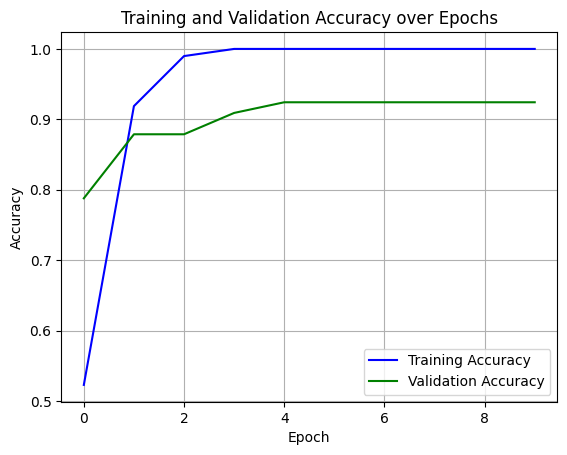

3/3 [==============================] - 0s 9ms/step - loss: 0.6045 - accuracy: 0.9242
Test Loss: 0.6045291423797607
Test Accuracy: 0.9242424368858337
3/3 [==============================] - 0s 6ms/step
Precision: 0.927807486631016
Recall: 0.9242424242424242
F1 Score: 0.9244407308377897
Confusion Matrix:
[[13  0  0  1  1]
 [ 1 12  0  0  0]
 [ 1  0  8  0  0]
 [ 0  0  0 15  0]
 [ 0  0  0  1 13]]


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input as preprocess_input_vgg19
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Directory containing your images
image_dir = "/content/drive/MyDrive/content/grayscaled"

# Load pre-trained VGG19 model
vgg19_model = VGG19(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Function to extract features from images using VGG19
def extract_features_vgg19(img_path):
    img = image.load_img(img_path, target_size=(100, 100))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_vgg19(x)
    features = vgg19_model.predict(x)
    features_flattened = features.flatten()
    return features_flattened

# List to store paths of all images
all_image_paths = []
# List to store ground truth labels
all_ground_truth_labels = []

# Iterate over images in the directory
for class_label in os.listdir(image_dir):
    class_dir = os.path.join(image_dir, class_label)
    if os.path.isdir(class_dir):
        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            all_image_paths.append(file_path)
            all_ground_truth_labels.append(class_label)

# Convert lists to numpy arrays
all_ground_truth_labels = np.array(all_ground_truth_labels)

# List to store features of all images
all_vgg19_features = []

# Extract features from images using VGG19
for img_path in all_image_paths:
    vgg19_features = extract_features_vgg19(img_path)
    all_vgg19_features.append(vgg19_features)

# Convert lists to numpy arrays
all_vgg19_features = np.array(all_vgg19_features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_vgg19_features, all_ground_truth_labels, test_size=0.25, random_state=42)

# Convert labels to numerical format
label_to_index = {label: i for i, label in enumerate(np.unique(all_ground_truth_labels))}
y_train_numeric = np.array([label_to_index[label] for label in y_train])
y_test_numeric = np.array([label_to_index[label] for label in y_test])

# Build a simple fully connected neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(label_to_index), activation='softmax') # Adjust output units
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with numeric labels
history = model.fit(X_train, y_train_numeric, epochs=10, batch_size=32, validation_data=(X_test, y_test_numeric))

# Obtain training history
history_dict = history.history

# Extract accuracy and loss values
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Plot training and validation accuracy
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='green')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_numeric)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Calculate additional evaluation metrics
predicted_labels = np.argmax(model.predict(X_test), axis=-1)
precision = precision_score(y_test_numeric, predicted_labels, average='weighted')
recall = recall_score(y_test_numeric, predicted_labels, average='weighted')
f1 = f1_score(y_test_numeric, predicted_labels, average='weighted')
conf_matrix = confusion_matrix(y_test_numeric, predicted_labels)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)


**InceptionV3 MODEL**

1/1 [==============================] - 0s 50ms/step
Epoch 1/10
7/7 [==============================] - 1s 39ms/step - loss: 1.5197 - accuracy: 0.3909 - val_loss: 1.1710 - val_accuracy: 0.6212
Epoch 2/10
7/7 [==============================] - 0s 9ms/step - loss: 0.7079 - accuracy: 0.8426 - val_loss: 1.0759 - val_accuracy: 0.6364
Epoch 3/10
7/7 [==============================] - 0s 11ms/step - loss: 0.3735 - accuracy: 0.8985 - val_loss: 0.8934 - val_accuracy: 0.7424
Epoch 4/10
7/7 [==============================] - 0s 11ms/step - loss: 0.2004 - accuracy: 0.9645 - val_loss: 0.9319 - val_accuracy: 0.7727
Epoch 5/10
7/7 [==============================] - 0s 10ms/step - loss: 0.1039 - accuracy: 0.9898 - val_loss: 1.0731 - val_accuracy: 0.7576
Epoch 6/10
7/7 [==============================] - 0s 11ms/step - loss: 0.0685 - accuracy: 0.9949 - val_loss: 1.1644 - val_accuracy: 0.7424
Epoch 7/10
7/7 [==============================] - 0s 11ms/step - loss: 0.0413 - accuracy: 1.0000 - val_loss: 0.9367

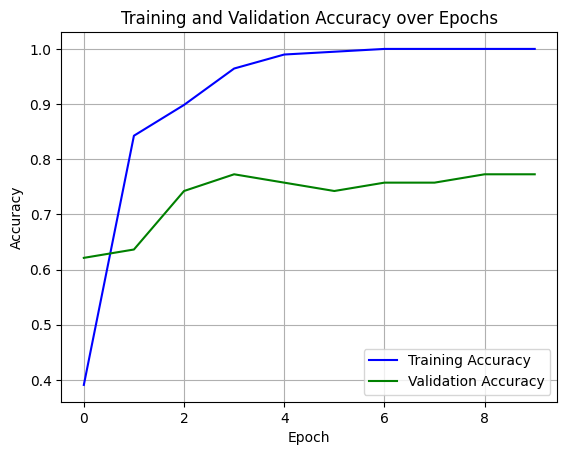

3/3 [==============================] - 0s 5ms/step - loss: 1.1536 - accuracy: 0.7727
Test Loss: 1.1535775661468506
Test Accuracy: 0.7727272510528564
3/3 [==============================] - 0s 4ms/step
Precision: 0.8016795147811191
Recall: 0.7727272727272727
F1 Score: 0.7749961572244181
Confusion Matrix:
[[13  1  0  0  1]
 [ 0  9  0  4  0]
 [ 1  0  7  1  0]
 [ 1  0  0 13  1]
 [ 2  0  0  3  9]]


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input as preprocess_input_inceptionv3
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Directory containing your images
image_dir = "/content/drive/MyDrive/content/grayscaled"

# Load pre-trained InceptionV3 model
inceptionv3_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Function to extract features from images using InceptionV3
def extract_features_inceptionv3(img_path):
    img = image.load_img(img_path, target_size=(100, 100))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_inceptionv3(x)
    features = inceptionv3_model.predict(x)
    features_flattened = features.flatten()
    return features_flattened

# List to store paths of all images
all_image_paths = []
# List to store ground truth labels
all_ground_truth_labels = []

# Iterate over images in the directory
for class_label in os.listdir(image_dir):
    class_dir = os.path.join(image_dir, class_label)
    if os.path.isdir(class_dir):
        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            all_image_paths.append(file_path)
            all_ground_truth_labels.append(class_label)

# Convert lists to numpy arrays
all_ground_truth_labels = np.array(all_ground_truth_labels)

# List to store features of all images
all_inceptionv3_features = []

# Extract features from images using InceptionV3
for img_path in all_image_paths:
    inceptionv3_features = extract_features_inceptionv3(img_path)
    all_inceptionv3_features.append(inceptionv3_features)

# Convert lists to numpy arrays
all_inceptionv3_features = np.array(all_inceptionv3_features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_inceptionv3_features, all_ground_truth_labels, test_size=0.25, random_state=42)

# Convert labels to numerical format
label_to_index = {label: i for i, label in enumerate(np.unique(all_ground_truth_labels))}
y_train_numeric = np.array([label_to_index[label] for label in y_train])
y_test_numeric = np.array([label_to_index[label] for label in y_test])

# Build a simple fully connected neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(label_to_index), activation='softmax') # Adjust output units
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with numeric labels
history = model.fit(X_train, y_train_numeric, epochs=10, batch_size=32, validation_data=(X_test, y_test_numeric))

# Obtain training history
history_dict = history.history

# Extract accuracy and loss values
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Plot training and validation accuracy
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='green')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_numeric)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Calculate additional evaluation metrics
predicted_labels = np.argmax(model.predict(X_test), axis=-1)
precision = precision_score(y_test_numeric, predicted_labels, average='weighted')
recall = recall_score(y_test_numeric, predicted_labels, average='weighted')
f1 = f1_score(y_test_numeric, predicted_labels, average='weighted')
conf_matrix = confusion_matrix(y_test_numeric, predicted_labels)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)


**EfficientNetB0 MODEL**

In [ ]:
pip install efficientnet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.8 MB/s eta 0:00:00


1/1 [==============================] - 0s 41ms/step
Epoch 1/10
7/7 [==============================] - 1s 66ms/step - loss: 402.2616 - accuracy: 0.1929 - val_loss: 1019.6716 - val_accuracy: 0.1818
Epoch 2/10
7/7 [==============================] - 0s 55ms/step - loss: 391.4704 - accuracy: 0.4010 - val_loss: 866.8950 - val_accuracy: 0.2273
Epoch 3/10
7/7 [==============================] - 0s 49ms/step - loss: 155.4613 - accuracy: 0.4619 - val_loss: 601.0825 - val_accuracy: 0.2727
Epoch 4/10
7/7 [==============================] - 0s 40ms/step - loss: 103.4311 - accuracy: 0.5838 - val_loss: 733.2709 - val_accuracy: 0.1364
Epoch 5/10
7/7 [==============================] - 0s 45ms/step - loss: 51.9535 - accuracy: 0.6701 - val_loss: 651.0606 - val_accuracy: 0.1970
Epoch 6/10
7/7 [==============================] - 0s 48ms/step - loss: 40.6358 - accuracy: 0.6853 - val_loss: 625.5020 - val_accuracy: 0.2273
Epoch 7/10
7/7 [==============================] - 0s 33ms/step - loss: 30.6415 - accuracy: 

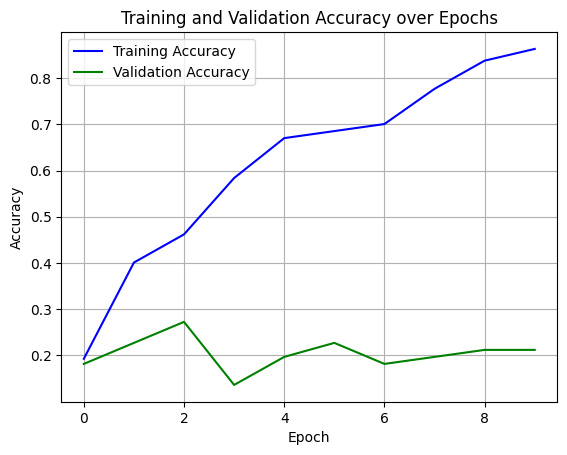

3/3 [==============================] - 0s 9ms/step - loss: 600.9064 - accuracy: 0.2121
Test Loss: 600.9064331054688
Test Accuracy: 0.21212121844291687
3/3 [==============================] - 0s 15ms/step
Precision: 0.17836452762923352
Recall: 0.21212121212121213
F1 Score: 0.1924948009506833
Confusion Matrix:
[[3 4 3 1 4]
 [6 0 1 5 1]
 [1 0 1 4 3]
 [2 0 3 7 3]
 [5 2 0 4 3]]


In [ ]:
import os
import numpy as np
import tensorflow as tf
from efficientnet.tfkeras import EfficientNetB0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_input_efficientnet
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Directory containing your images
image_dir = "/content/drive/MyDrive/content/grayscaled"

# Load pre-trained EfficientNetB0 model
efficientnet_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Function to extract features from images using EfficientNetB0
def extract_features_efficientnet(img_path):
    img = image.load_img(img_path, target_size=(100, 100))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_efficientnet(x)
    features = efficientnet_model.predict(x)
    features_flattened = features.flatten()
    return features_flattened

# List to store paths of all images
all_image_paths = []
# List to store ground truth labels
all_ground_truth_labels = []

# Iterate over images in the directory
for class_label in os.listdir(image_dir):
    class_dir = os.path.join(image_dir, class_label)
    if os.path.isdir(class_dir):
        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            all_image_paths.append(file_path)
            all_ground_truth_labels.append(class_label)

# Convert lists to numpy arrays
all_ground_truth_labels = np.array(all_ground_truth_labels)

# List to store features of all images
all_efficientnet_features = []

# Extract features from images using EfficientNetB0
for img_path in all_image_paths:
    efficientnet_features = extract_features_efficientnet(img_path)
    all_efficientnet_features.append(efficientnet_features)

# Convert lists to numpy arrays
all_efficientnet_features = np.array(all_efficientnet_features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_efficientnet_features, all_ground_truth_labels, test_size=0.25, random_state=42)

# Convert labels to numerical format
label_to_index = {label: i for i, label in enumerate(np.unique(all_ground_truth_labels))}
y_train_numeric = np.array([label_to_index[label] for label in y_train])
y_test_numeric = np.array([label_to_index[label] for label in y_test])

# Build a simple fully connected neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(label_to_index), activation='softmax') # Adjust output units
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with numeric labels
history = model.fit(X_train, y_train_numeric, epochs=10, batch_size=32, validation_data=(X_test, y_test_numeric))

# Obtain training history
history_dict = history.history

# Extract accuracy and loss values
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Plot training and validation accuracy
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='green')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_numeric)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Calculate additional evaluation metrics
predicted_labels = np.argmax(model.predict(X_test), axis=-1)
precision = precision_score(y_test_numeric, predicted_labels, average='weighted')
recall = recall_score(y_test_numeric, predicted_labels, average='weighted')
f1 = f1_score(y_test_numeric, predicted_labels, average='weighted')
conf_matrix = confusion_matrix(y_test_numeric, predicted_labels)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)


**COMPARISON SECTION**

In [ ]:
import pandas as pd
import altair as alt

# Enable Altair to render plots in Colab
alt.renderers.enable('colab')

# Test data
model_names = ['Naive Bayes', 'Random Forest', 'SVM', 'CNN', 'MobileNetV2', 'DenseNet121', 'ResNet50', 'VGG19', 'InceptionV3', 'EfficientNetB0']
test_accuracy_scores = [0.19, 0.33, 0.35, 0.46, 0.51, 0.93, 0.95, 0.92, 0.77, 0.21]
precision_scores = [0.26, 0.32, 0.38, 0.51, 0.53, 0.94, 0.95, 0.92, 0.80, 0.17]
recall_scores = [0.20, 0.30, 0.32, 0.49, 0.51, 0.93, 0.95, 0.92, 0.77, 0.21]
f1_scores = [0.18, 0.28, 0.32, 0.49, 0.51, 0.93, 0.95, 0.92, 0.77, 0.19]

# Create a DataFrame
data = pd.DataFrame({'Model': model_names,
                     'Test Accuracy': test_accuracy_scores,
                     'Precision': precision_scores,
                     'Recall': recall_scores,
                     'F1 Score': f1_scores})

# Melt the dataframe to long format
data_melted = data.melt('Model', var_name='Metric', value_name='Score')

# Create an interactive plot using Altair with increased plot size
chart = alt.Chart(data_melted).mark_bar().encode(
    x='Score:Q',
    y=alt.Y('Model:N', sort='-x'),
    color='Metric:N',
    tooltip=['Model', 'Metric', 'Score']
).properties(
    width=800,  # Increased width
    height=500, # Increased height
    title='Model Scores Comparison'
).interactive()

# Show the plot
chart


alt.Chart(...)

In [ ]:
import plotly.graph_objects as go

# Accuracy scores for different models
model_names = ['Naive Bayes', 'Random Forest', 'SVM', 'CNN', 'MobileNetV2', 'DenseNet121', 'ResNet50', 'VGG19', 'InceptionV3', 'EfficientNetB0']
accuracy_scores = [0.19,0.33,0.35,0.46,0.51,0.93,0.95,0.92,0.77,0.21]

# Create a Radar chart
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=accuracy_scores,
      theta=model_names,
      fill='toself',
      name='Accuracy Scores'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=False
)

fig.show()


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
from sklearn.metrics import confusion_matrix

# Accuracy scores for different models
model_names = ['Naive Bayes', 'Random Forest', 'SVM', 'CNN', 'MobileNetV2', 'DenseNet121', 'ResNet50', 'VGG19', 'InceptionV3', 'EfficientNetB0']
accuracy_scores = [0.19,0.33,0.35,0.46,0.51,0.93,0.95,0.92,0.77,0.21]

# Step 1: Rank Models based on accuracy scores
sorted_indices = np.argsort(accuracy_scores)[::-1]  # Sort indices in descending order
sorted_model_names = [model_names[i] for i in sorted_indices]
sorted_accuracy_scores = [accuracy_scores[i] for i in sorted_indices]

# Step 2: Perform Statistical Testing (one-way ANOVA)
# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(accuracy_scores, accuracy_scores)  # You need to provide multiple arrays here

# Interpret the results
alpha = 0.05  # significance level
print(f"ANOVA F-Statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("The differences in accuracy scores of the models are statistically significant.")
else:
    print("The differences in accuracy scores of the models are not statistically significant.")

# Step 3: Model Selection
best_model = sorted_model_names[0]
print(f"The best model selected based on accuracy scores is: {best_model}")


# Step 4: Model Selection (Top Three Models)
top_three_models = sorted_model_names[:3]

print("The top three models selected based on accuracy scores are:")
for i, model in enumerate(top_three_models, 1):
    print(f"{i}. {model}")



ANOVA F-Statistic: -1.1339353754052506e-31
P-value: nan
The differences in accuracy scores of the models are not statistically significant.
The best model selected based on accuracy scores is: ResNet50
The top three models selected based on accuracy scores are:
1. ResNet50
2. DenseNet121
3. VGG19
